<a href="https://colab.research.google.com/github/MathRunner7/Product_Sales_Forecasting/blob/main/Product_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Problem Statement and pre-processing and EDA

## 0. Introduction

**Purpose of this project**

Need and Use of Product Sales Forecasting
Effective sales forecasting is fundamental for multiple aspects of retail management and operation, including:
1.	**Inventory Management:** Accurate sales forecasts help ensure that stores maintain optimal inventory levels—enough to meet customer demand without overstocking, which can lead to increased costs or waste, especially in the case of perishable goods.
2.	**Financial Planning:** Forecasting sales allows businesses to estimate future revenue and manage budgets more effectively. This is crucial for allocating resources to areas such as marketing, staffing, and capital investments.
3.	**Marketing and Promotions:** Understanding when sales peaks and troughs are likely to occur enables retailers to plan effective marketing campaigns and promotional offers to boost revenue or manage customer flow.
4.	**Supply Chain Optimization:** Sales forecasts inform production schedules, logistics, and distribution plans, ensuring that products are available where and when they are needed, thereby reducing transportation and storage costs.
5.	**Strategic Decision Making:** Long-term sales forecasting supports broader business strategies, including store expansions, market entry, and other capital expenditures.

Dataset: https://drive.google.com/drive/folders/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn
> Data description

Sr|Column Name|Description
--|--|--
1	|ID| Unique identifier for each record in the dataset.
2	|Store_id| Unique identifier for each store.
3	|Store_Type| Categorization of the store based on its type.
4	|Location_Type| Classification of the store's location (e.g., urban, suburban).
5	|Region_Code| Code representing the geographical region where the store is located.
6	|Date| The specific date on which the data was recorded.
7	|Holiday| Indicator of whether the date was a holiday (1: Yes, 0: No).
8	|Discount| Indicates whether a discount was offered on the given date (Yes/No).
9	|#Order| The number of orders received by the store on the specified day.
10	|Sales| Total sales amount for the store on the given day.


## 1. Dataset Loading

In [1]:
# Import Basic libraries
import pandas as pd
import numpy as np

# Import Visualization libraries
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Suppress the specific ConvergenceWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Read train and test .csv files into Pandas dataframe format
train_url = 'https://drive.google.com/uc?id=1Rfz9d8m_2CGMoQYBNHhgTP9qTAlUcp2-'
test_url = 'https://drive.google.com/uc?id=1UHRbWau_md8x0Wz9cFwGv6LZV0xJxKwj'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [3]:
train.sample(5)

ID  Store_id Store_Type Location_Type Region_Code        Date  \
177382  T1177383       288         S3            L2          R3  2019-05-01   
50482   T1050483        14         S3            L2          R4  2018-05-19   
182575  T1182576       296         S1            L1          R1  2019-05-16   
49775   T1049776       307         S1            L5          R2  2018-05-17   
141292  T1141293        16         S1            L3          R1  2019-01-23   

        Holiday Discount  #Order    Sales  
177382        0       No     133  89334.0  
50482         0       No      88  65295.0  
182575        0      Yes      53  37749.0  
49775         0       No      22  13644.0  
141292        0      Yes      82  44496.0

In [4]:
test.sample(5)

ID  Store_id Store_Type Location_Type Region_Code        Date  \
7070   T1195411       112         S1            L1          R3  2019-06-20   
3099   T1191440       357         S4            L1          R1  2019-06-09   
15979  T1204320        84         S1            L1          R3  2019-07-14   
9535   T1197876        90         S1            L1          R3  2019-06-27   
18380  T1206721       177         S2            L1          R4  2019-07-21   

       Holiday Discount  
7070         0      Yes  
3099         0       No  
15979        0       No  
9535         0       No  
18380        0      Yes

## 2. Observations on Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [8]:
train.describe().T

count                           mean                  min  \
Store_id  188340.0                          183.0                  1.0   
Date        188340  2018-09-15 12:00:00.000000256  2018-01-01 00:00:00   
Holiday   188340.0                       0.131783                  0.0   
#Order    188340.0                      68.205692                  0.0   
Sales     188340.0                   42784.327982                  0.0   

                          25%                  50%                  75%  \
Store_id                 92.0                183.0                274.0   
Date      2018-05-09 18:00:00  2018-09-15 12:00:00  2019-01-22 06:00:00   
Holiday                   0.0                  0.0                  0.0   
#Order                   48.0                 63.0                 82.0   
Sales                 30426.0              39678.0              51909.0   

                          max           std  
Store_id                365.0    105.366308  
Date      2019-05-31 00:00:00           NaN  
Holiday                   1.0      0.338256  
#Order                  371.0     30.467415  
Sales                247215.0  18456.708302

In [9]:
test.describe().T

count                           mean                  min  \
Store_id  22265.0                          183.0                  1.0   
Date        22265  2019-06-30 23:59:59.999999744  2019-06-01 00:00:00   
Holiday   22265.0                       0.032787                  0.0   

                          25%                  50%                  75%  \
Store_id                 92.0                183.0                274.0   
Date      2019-06-16 00:00:00  2019-07-01 00:00:00  2019-07-16 00:00:00   
Holiday                   0.0                  0.0                  0.0   

                          max         std  
Store_id                365.0  105.368395  
Date      2019-07-31 00:00:00         NaN  
Holiday                   1.0    0.178082

## 3. Handling missing values and Preprocessing

In [10]:
train_null = train.isna().sum().sum()
test_null = test.isna().sum().sum()
print(f'There are {train_null} nulls in train dataset and {test_null} nulls in test dataset.')

There are 0 nulls in train dataset and 0 nulls in test dataset.


In [11]:
# Define dataset type in separate column for train and test
train['Train'] = True
test['Train'] = False

In [12]:
def decorator(func):
  def wrapper(*args, **kwargs):
    print('='*50)
    result = func(*args, **kwargs)
    print('='*50)
    return result
  return wrapper

@decorator
def df_size(df,typ):
  size = df.memory_usage().sum()/(1024**2)
  print(f'Size of {typ} data is: {size:.2f} MB')
  return size

In [13]:
# Combine both the dataset into single dataframe
data = pd.concat([train, test])
raw_size = df_size(data, 'Non-Converted')
data.reset_index(drop=True, inplace=True)
# Change Datatypes to optimize sizes
# Store_id as unsigned integer 16 (Range is 1 to 371)
data.Store_id = data.Store_id.astype('uint16')
# Store_Type, Location_Type, Region_Code as categorical
data.Store_Type = data.Store_Type.astype('category')
data.Location_Type = data.Location_Type.astype('category')
data.Region_Code = data.Region_Code.astype('category')
# Holiday and Discount as Boolean
data.Holiday = data.Holiday.astype('bool')
data.replace({'Discount':{'Yes':True, 'No':False}}, inplace=True)
# Drop unnecessary column Transaction ID
data.pop('ID')
data.set_index('Date', inplace=True)
processed_size = df_size(data, 'Converted')
reduction = 100*(raw_size - processed_size)/raw_size
print(f'''Reduction in size after processing is: {reduction:.2f}%''')
print('='*50)

Size of Non-Converted data is: 17.88 MB
Size of Converted data is: 6.43 MB
Reduction in size after processing is: 64.04%


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210605 entries, 2018-01-01 to 2019-07-31
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Store_id       210605 non-null  uint16  
 1   Store_Type     210605 non-null  category
 2   Location_Type  210605 non-null  category
 3   Region_Code    210605 non-null  category
 4   Holiday        210605 non-null  bool    
 5   Discount       210605 non-null  bool    
 6   #Order         188340 non-null  float64 
 7   Sales          188340 non-null  float64 
 8   Train          210605 non-null  bool    
dtypes: bool(3), category(3), float64(2), uint16(1)
memory usage: 6.4 MB


In [15]:
data.describe()

Store_id         #Order          Sales
count  210605.000000  188340.000000  188340.000000
mean      183.000000      68.205692   42784.327982
std       105.366279      30.467415   18456.708302
min         1.000000       0.000000       0.000000
25%        92.000000      48.000000   30426.000000
50%       183.000000      63.000000   39678.000000
75%       274.000000      82.000000   51909.000000
max       365.000000     371.000000  247215.000000

In [16]:
# Rename #Order column name for ease of use
data.rename(columns={'#Order':'Order'}, inplace=True)

In [17]:
# Assign index to Exogenous variable dataframe
exog_holiday = data.Holiday
exog_discount = data.Discount
exog = pd.concat([exog_holiday, exog_discount, data.Train], axis=1)
exog_train = exog[exog.Train == True][['Holiday','Discount']]
exog_test = exog[exog.Train == False][['Holiday','Discount']]

## 4. Feature Engineering

In [18]:
# @title Developing Features from date
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter
data['Month'] = data.index.month
data['MonthName'] = data.index.month_name()
data['Day'] = data.index.day
data['Week'] = data.index.isocalendar().week
data['Weekday'] = data.index.weekday
data['DayName'] = data.index.day_name()
data['Weekend'] = data.Weekday.apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

In [19]:
# @title Additional features
data['S/O'] = round(data.Sales/data.Order,2)

In [20]:
data.sample(5)

Store_id Store_Type Location_Type Region_Code  Holiday  Discount  \
Date                                                                           
2018-04-04       313         S1            L3          R1    False     False   
2018-08-21       194         S1            L1          R2    False      True   
2019-07-15       139         S4            L2          R2    False      True   
2018-12-03        41         S1            L1          R2    False     False   
2018-02-19       272         S2            L4          R2     True      True   

            Order     Sales  Train  Year  Quarter  Month MonthName  Day  Week  \
Date                                                                            
2018-04-04   45.0  26319.00   True  2018        2      4     April    4    14   
2018-08-21   62.0  38856.00   True  2018        3      8    August   21    34   
2019-07-15    NaN       NaN  False  2019        3      7      July   15    29   
2018-12-03   63.0  38562.00   True  2018        4     12  December    3    49   
2018-02-19   50.0  35378.64   True  2018        1      2  February   19     8   

            Weekday    DayName  Weekend     S/O  
Date                                             
2018-04-04        2  Wednesday  Weekday  584.87  
2018-08-21        1    Tuesday  Weekday  626.71  
2019-07-15        0     Monday  Weekday     NaN  
2018-12-03        0     Monday  Weekday  612.10  
2018-02-19        0     Monday  Weekday  707.57

In [21]:
# Split the data into train and test before proceeding further
train = data[data.Train == True]
test = data[data.Train == False]

## 5. EDA

### Visual Analysis

In [22]:
#@title **Univariate Analysis: Distribution of numerical data**
fig = make_subplots(rows=1, cols=3, subplot_titles=('Order','Sales','Sales per Order'))
fig.add_trace(go.Histogram(x=train.Order), row=1, col=1)
fig.add_trace(go.Histogram(x=train.Sales), row=1, col=2)
fig.add_trace(go.Histogram(x=train['S/O']), row=1, col=3)
fig.update_layout(title='Order, Sales and Sales/Order distribution', showlegend=False)
fig.show()

In [23]:
#@title **Bivariate Analysis: Bar Charts**
order_color = 'red'
sales_color = 'blue'
fig = make_subplots(rows=2, cols=4)
grouped = train.groupby('Store_Type').agg({'Order':'sum','Sales':'sum'})
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Order, marker=dict(color=order_color)), row=1, col=1)
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Sales, marker=dict(color=sales_color)), row=2, col=1)
grouped = train.groupby('Location_Type').agg({'Order':'sum','Sales':'sum'})
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Order, marker=dict(color=order_color)), row=1, col=2)
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Sales, marker=dict(color=sales_color)), row=2, col=2)
grouped = train.groupby('Region_Code').agg({'Order':'sum','Sales':'sum'})
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Order, marker=dict(color=order_color)), row=1, col=3)
fig.add_trace(go.Bar(x=grouped.index, y=grouped.Sales, marker=dict(color=sales_color)), row=2, col=3)
grouped = train.groupby(['Weekday','DayName']).agg({'Order':'sum','Sales':'sum'}).reset_index()
fig.add_trace(go.Bar(x=grouped.DayName, y=grouped.Order, marker=dict(color=order_color)), row=1, col=4)
fig.add_trace(go.Bar(x=grouped.DayName, y=grouped.Sales, marker=dict(color=sales_color)), row=2, col=4)
fig.update_layout(title='Order, Sales and Sales/Order distribution', showlegend=False)

fig.update_yaxes(title='Order Volume', row=1, col=1)
fig.update_yaxes(title='Sales Amount', row=2, col=1)

fig.update_xaxes(title='Store Type', row=2, col=1)
fig.update_xaxes(title='Location Type', row=2, col=2)
fig.update_xaxes(title='Region Code', row=2, col=3)

fig.show()

In [24]:
#@title **Top/Bottom 10s**
fig = make_subplots(rows=2, cols=1, subplot_titles=('Top/Bottom 10 Store IDs', ''))
top_order = train.groupby('Store_id').agg({'Order':'sum'}).sort_values('Order', ascending=False).head(10)
top_sales = train.groupby('Store_id').agg({'Sales':'sum'}).sort_values('Sales', ascending=False).head(10)
bottom_order = train.groupby('Store_id').agg({'Order':'sum'}).sort_values('Order', ascending=False).tail(10)
bottom_sales = train.groupby('Store_id').agg({'Sales':'sum'}).sort_values('Sales', ascending=False).tail(10)
tb_order = pd.concat([top_order, bottom_order])
tb_sales = pd.concat([top_sales, bottom_sales])
fig.add_trace(go.Bar(x=tb_order.index, y=tb_order.Order, name='Order', marker=dict(color=order_color)), row=1, col=1)
fig.add_trace(go.Bar(x=tb_sales.index, y=tb_sales.Sales, name='Sales', marker=dict(color=sales_color)), row=2, col=1)
fig.update_layout(xaxis=dict(type='category'),
                  xaxis2=dict(type='category'),
                  yaxis=dict(title='Order Volume'),
                  yaxis2=dict(title='Sales Amount'),
                  showlegend=False)
fig.show()

In [25]:
#@title **Bi-variate Analysis: Order/Sales Scatter Plots**
def scatter_plots(df, column):
  categories = df[column].unique().sort_values()
  fig = make_subplots(rows=1, cols=len(categories), subplot_titles=categories)
  for i, category in enumerate(categories):
    fig.add_trace(go.Scatter(x=df[df[column] == category]['Order'], y=df[df[column] == category]['Sales'],
                             mode='markers', marker=dict(size=2), name=category,),row=1, col=i+1)
    fig.update_xaxes(range = [0,300], row=1, col=i+1)
    fig.update_yaxes(range = [0,250000], row=1, col=i+1)
  fig.update_layout(title=f'{column} wise Order v/s Sales Scatter Plot', height = 400, showlegend=False)
  fig.show()

def scatter_save(df, column):
  categories = df[column].unique().sort_values()
  for category in categories:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df[column] == category]['Order'], y=df[df[column] == category]['Sales'],
                             mode='markers', marker=dict(size=2), name=category,))
    fig.update_xaxes(range = [0,300])
    fig.update_yaxes(range = [0,250000])
    fig.update_layout(title=f'{column} wise Order v/s Sales Scatter Plot', title_x=0.5, showlegend=False,
                      xaxis_title='Order Volume', yaxis_title='Sales Amount')
    pio.write_html(fig, f'{column}_{category}_scatter.html', full_html=False)

In [26]:
ignore = True
if not ignore:
  scatter_plots(train,'Store_Type')
  scatter_plots(train,'Region_Code')
  scatter_plots(train,'Location_Type')
  scatter_plots(train,'Holiday')
  scatter_plots(train,'Discount')

In [27]:
ignore = True
if not ignore:
  scatter_save(train,'Store_Type')
  scatter_save(train,'Region_Code')
  scatter_save(train,'Location_Type')
  scatter_save(train,'Holiday')
  scatter_save(train,'Discount')

### Hypothesis Testing

In [28]:
#@title **Chi-Square test for dependency**
from scipy.stats import chi2_contingency

@decorator
def chi2test(data, category1, category2, alpha=0.05):
  data = data.groupby(by=[category1, category2]).agg({'Order':'sum', 'Sales':'sum'}).reset_index()
  test = chi2_contingency(data.pivot(index=category1,columns=category2,values='Order').fillna(0))
  order_dependency = test.pvalue < alpha
  if order_dependency:
    print(f'Reject the Null Hypothesis. For Order volume, {category1} and {category2} are dependent', end=" | ")
  else:
    print(f'Fail to reject the Null Hypothesis. For Order volume, {category1} and {category2} are independent', end=" | ")
  print(f'Test statistics:{test.statistic},\tp-value:{test.pvalue}')

  test = chi2_contingency(data.pivot(index=category1,columns=category2,values='Sales').fillna(0))
  sales_dependency = test.pvalue < alpha
  if sales_dependency:
    print(f'Reject the Null Hypothesis. For Sales amount, {category1} and {category2} are dependent', end=" | ")
  else:
    print(f'Fail to reject the Null Hypothesis. For Sales amount, {category1} and {category2} are independent', end=" | ")
  print(f'Test statistics:{test.statistic},\tp-value:{test.pvalue}')

  return {'C1':category1, 'C2':category2,'Order': order_dependency, 'Sales': sales_dependency}

In [29]:
from itertools import permutations
columns = ['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount', 'MonthName', 'DayName']
dependancy_summary = pd.DataFrame([chi2test(train,c1,c2) for c1,c2 in list(permutations(columns,2))])

Reject the Null Hypothesis. For Order volume, Store_Type and Location_Type are dependent | Test statistics:8560447.197307907,	p-value:0.0
Reject the Null Hypothesis. For Sales amount, Store_Type and Location_Type are dependent | Test statistics:5347008627.585614,	p-value:0.0
Reject the Null Hypothesis. For Order volume, Store_Type and Region_Code are dependent | Test statistics:2063286.1134297573,	p-value:0.0
Reject the Null Hypothesis. For Sales amount, Store_Type and Region_Code are dependent | Test statistics:1263592484.9694943,	p-value:0.0
Reject the Null Hypothesis. For Order volume, Store_Type and Holiday are dependent | Test statistics:27.94049935419796,	p-value:3.7379941858049926e-06
Reject the Null Hypothesis. For Sales amount, Store_Type and Holiday are dependent | Test statistics:21093.7298558246,	p-value:0.0
Reject the Null Hypothesis. For Order volume, Store_Type and Discount are dependent | Test statistics:321.25338064274575,	p-value:2.497032993795113e-69
Reject the Null 

In [30]:
pd.crosstab(dependancy_summary.C1, dependancy_summary.C2, dependancy_summary.Order, aggfunc='max')

C2            DayName Discount Holiday Location_Type MonthName Region_Code  \
C1                                                                           
DayName           NaN     True    True          True      True        True   
Discount         True      NaN    True          True      True        True   
Holiday          True     True     NaN          True      True       False   
Location_Type    True     True    True           NaN      True        True   
MonthName        True     True    True          True       NaN        True   
Region_Code      True     True   False          True      True         NaN   
Store_Type       True     True    True          True      True        True   

C2            Store_Type  
C1                        
DayName             True  
Discount            True  
Holiday             True  
Location_Type       True  
MonthName           True  
Region_Code         True  
Store_Type           NaN

In [31]:
pd.crosstab(dependancy_summary.C1, dependancy_summary.C2, dependancy_summary.Sales, aggfunc='max')

C2            DayName Discount Holiday Location_Type MonthName Region_Code  \
C1                                                                           
DayName           NaN     True    True          True      True        True   
Discount         True      NaN    True          True      True        True   
Holiday          True     True     NaN          True      True        True   
Location_Type    True     True    True           NaN      True        True   
MonthName        True     True    True          True       NaN        True   
Region_Code      True     True    True          True      True         NaN   
Store_Type       True     True    True          True      True        True   

C2            Store_Type  
C1                        
DayName             True  
Discount            True  
Holiday             True  
Location_Type       True  
MonthName           True  
Region_Code         True  
Store_Type           NaN

In [32]:
#@title **Mean similarity test**
from scipy.stats import f_oneway, kruskal, anderson, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations

def decorator(func):
  def wrapper(*args, **kwargs):
    print('~'*100)
    print('~'*100)
    result = func(*args, **kwargs)
    print('~'*100)
    print('~'*100)
    return result
  return wrapper

@decorator
def variance_test(data, category, target, alpha=0.05):
  d = data.groupby(by=category).agg(Mean=(target,'mean'), Count=(target, 'size')).reset_index()
  print(f'Hypothesis test whether Mean {target} is same for all {category} or not.\n')
  print(d)
  print('='*53)
  cats = sorted(data[category].unique())
  groups = {}
  for cat in cats:
     groups[cat]=data[data[category] == cat][target]

  # Check for Normality test of all categories
  normality_test = True
  print('Criteria check for ANOVA')
  for cat,group in groups.items():
    if not anderson(group).fit_result.success:
      normality_test = False
      print(f'\033[31m \u274C Group {cat} is not normally distributed.\033[0m')
      break
  if normality_test:
    print('\033[32m \u2705 All groups are normally distributed.\033[0m')
  # Check for levene test
  levene_test = True
  _, p_levene = levene(*groups.values())
  if p_levene < alpha:
    levene_test = False
    print(f'\033[31m \u274C Variance of all groups are not same.\033[0m')
  else:
    print(f'\033[32m \u2705 Variance of all groups are same.\033[0m')

  # Perform One-way ANOVA if criteria meets otheriwse perform Kruskal
  if normality_test and levene_test:
    print('One-Way ANOVA will be performed.')
    _, p_value = f_oneway(*groups.values())
  else:
    print('All criterias not met for ANOVA. Kruskal test will be performed.')
    _, p_value = kruskal(*groups.values())

  # Proceed for ttest_ind if one group has different mean
  if p_value > alpha:
    print(f'p-Value is {p_value} > {alpha} Significance level.\nWe dont have enough evidence to  reject the Null Hypothesis. All means are same.')
    print('='*53)
    return None
  else:
    print(f'p-Value is {p_value} < {alpha} Significance level.\nWe have enough evidence to reject the Null Hypothesis and at least one mean is different.')
    print('='*53)

  tukey = pairwise_tukeyhsd(endog=data[target], groups=data[category], alpha=0.05)
  print(tukey)
  # Extract group1 and group2 using the Tukey object attributes
  group1 = tukey.groupsunique[tukey._multicomp.pairindices[0]]
  group2 = tukey.groupsunique[tukey._multicomp.pairindices[1]]
  pair = [f'{a}-{b}' for a,b in list(zip(group1, group2))]
  reject = tukey.reject

  # Combine group1 and group2 into a DataFrame
  group_pairs = pd.DataFrame({'pair': pair, 'reject': reject})
  same_mean_pairs = group_pairs[group_pairs['reject'] == False]['pair']
  different_mean_pairs = group_pairs[group_pairs['reject'] == True]['pair']
  print(f'\033[34mPairs having different {target} mean are: {",".join(different_mean_pairs.values)}')
  print(f'\033[35mPairs having same {target} mean are: {",".join(same_mean_pairs.values)}\033[0m')

  return None

In [33]:
from itertools import product
for category, target in product(columns, ['Order', 'Sales']):
  variance_test(train, category, target)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Hypothesis test whether Mean Order is same for all Store_Type or not.

  Store_Type        Mean  Count
0         S1   58.022095  88752
1         S2   40.472799  28896
2         S3   73.663396  24768
3         S4  102.392779  45924
Criteria check for ANOVA
 ✅ All groups are normally distributed.
 ❌ Variance of all groups are not same.
All criterias not met for ANOVA. Kruskal test will be performed.
p-Value is 0.0 < 0.05 Significance level.
We have enough evidence to reject the Null Hypothesis and at least one mean is different.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    S1     S2 -17.5493   0.0 -17.9275 -17.1711   True
    S1     S3  15.6413   0.0    15.24  16.0426   

## 6. Data Preperation for modeling

In [34]:
# Data Preperation for modeling
# Data for Sales forecastig model training
overall_sales = train.groupby(level=0).agg({'Sales':'sum'})
id_wise_sales = pd.crosstab(index=train.index, columns=train.Store_id, values =train.Sales, aggfunc='sum')
store_type_wise_sales = pd.crosstab(index=train.index, columns=train.Store_Type, values =train.Sales, aggfunc='sum')
location_wise_sales = pd.crosstab(index=train.index, columns=train.Location_Type, values =train.Sales, aggfunc='sum')
region_wise_sales = pd.crosstab(index=train.index, columns=train.Region_Code, values =train.Sales, aggfunc='sum')

# Data for Order forecastig model training
overall_order = train.groupby(level=0).agg({'Order':'sum'})
id_wise_order = pd.crosstab(index=train.index, columns=train.Store_id, values =train.Order, aggfunc='sum')
store_type_wise_order = pd.crosstab(index=train.index, columns=train.Store_Type, values =train.Order, aggfunc='sum')
location_wise_order = pd.crosstab(index=train.index, columns=train.Location_Type, values =train.Order, aggfunc='sum')
region_wise_order = pd.crosstab(index=train.index, columns=train.Region_Code, values =train.Order, aggfunc='sum')

# Create a Single DataFrame for Sales and Order
train_sales = pd.concat([overall_sales, id_wise_sales, store_type_wise_sales, location_wise_sales, region_wise_sales], axis=1)
train_order = pd.concat([overall_order, id_wise_order, store_type_wise_order, location_wise_order, region_wise_order], axis=1)

exog_train_holiday = train.groupby(train.index).mean('Holiday')['Holiday']
exog_test_holiday = test.groupby(test.index).mean('Holiday')['Holiday']

## 7. Time series plots

In [35]:
#@title Function to plot the data
def plot_sales(data, code):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data.index, y=data[code], mode='lines', name=code))
  fig.add_trace(go.Bar(x=data.index, y=exog_train_holiday, name='campaign', yaxis='y2', opacity=1))
  fig.update_layout(title=f'Timeseries for {code}', showlegend=False, title_x=0.12,
      yaxis=dict(title='Sales Amount'),
      yaxis2=dict(overlaying='y', showline=False, showgrid=False, showticklabels=False, side='right'))
  return fig

def plot_order(data, code):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data.index, y=data[code], mode='lines', name=code))
  fig.add_trace(go.Bar(x=data.index, y=exog_train_holiday, name='campaign', yaxis='y2', opacity=1))
  fig.update_layout(title=f'Timeseries for {code}', showlegend=False, title_x=0.12,
      yaxis=dict(title='Order Volume'),
      yaxis2=dict(overlaying='y', showline=False, showgrid=False, showticklabels=False, side='right'))
  return fig

In [36]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": True}]])
for trace in plot_order(overall_order, 'Order').data:
  secondary_y = "yaxis" in trace and trace["yaxis"] == "y2"
  fig.add_trace(trace, row=1, col=1)
for trace in plot_sales(overall_sales, 'Sales').data:
  secondary_y = "yaxis" in trace and trace["yaxis"] == "y2"
  fig.add_trace(trace, row=2, col=1)
fig.show()

In [37]:
df_order = region_wise_order
df_sales = region_wise_sales
for code in df_order.columns:
  plot_order(df_order, code).show()
  plot_sales(df_sales, code).show()

In [38]:
df_order = location_wise_order
df_sales = location_wise_sales
for code in df_order.columns:
  plot_order(df_order, code).show()
  plot_sales(df_sales, code).show()

In [39]:
df_order = store_type_wise_order
df_sales = store_type_wise_sales
for code in df_order.columns:
  plot_order(df_order, code).show()
  plot_sales(df_sales, code).show()

# B. Stationarity, decomposition, detrending, ACF, and PACF

## 8. Stationarity test and decomposition

Most of timeseries model (like **AR, MA, ARIMA**) works on assumption of Stationarity, which makes it easier to predict future values, estimate model parameters, and perform statistical tests. By transforming non-stationary data into a stationary form, analysts can apply a broader range of statistical tools and achieve more reliable results.

To check stationarity of timeseries we will use Augmanted Dickey-Duller test with 5% significance level as threshold.

In [40]:
# Import ACF/PACF plotting modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [41]:
#@title Print Dickey-Fuller test insights
def adf_test(dataset):
  print(f'Results of Dickey-Fuller Test:')
  for code in dataset.columns:
    pvalue = adfuller(dataset[code])[1]
    if pvalue <= 0.05:
      print(f'\033[32mTimeseries for "{code}" is stationary', end='.\t')
    else:
      print(f'\033[31mTimeseries for "{code}" is not stationary', end='.')
    print(f'\tp-value is {pvalue}\033[0m')

In [42]:
adf_test(id_wise_sales)
adf_test(store_type_wise_sales)
adf_test(region_wise_sales)
adf_test(location_wise_sales)

Results of Dickey-Fuller Test:
Timeseries for "1" is stationary.		p-value is 0.0010072301346594694
Timeseries for "2" is stationary.		p-value is 0.00031561292823509697
Timeseries for "3" is stationary.		p-value is 0.008991511921083137
Timeseries for "4" is stationary.		p-value is 0.0002737671033380586
Timeseries for "5" is stationary.		p-value is 0.005051306139498406
Timeseries for "6" is stationary.		p-value is 0.013888862311180786
Timeseries for "7" is stationary.		p-value is 0.008717157545251238
Timeseries for "8" is stationary.		p-value is 0.00013217108310095206
Timeseries for "9" is stationary.		p-value is 2.9868967309125026e-21
Timeseries for "10" is stationary.		p-value is 9.122877817511299e-05
Timeseries for "11" is stationary.		p-value is 0.00023967290176901514
Timeseries for "12" is stationary.		p-value is 0.009512150715144845
Timeseries for "13" is stationary.		p-value is 0.022684796879694213
Timeseries for "14" is stationary.		p-value is 0.0001438788771060245
Timeseries for

### **Pipeline**

In [43]:
#@title Stage-1 Converting to stationary data
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.tsa.stattools import adfuller

class StationarityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, significance_level=0.05, max_differencing=2):
        self.significance_level = significance_level
        self.max_differencing = max_differencing
        self.difference_order = 0  # Tracks how many differencing operations were applied

    def adf_test(self, series):
        """Perform ADF test and return p-value."""
        result = adfuller(series, autolag='AIC')
        return result[1]  # Return p-value

    def fit(self, X, y=None):
        """Fit method to comply with scikit-learn API. No fitting required here."""
        return self

    def transform(self, X, y=None):
        """Apply transformations to ensure stationarity."""
        if isinstance(X, pd.Series):
            transformed = X.copy()
        else:
            transformed = pd.Series(X)
        p_value = self.adf_test(transformed.dropna())
        differencing_order = 0
        while p_value > self.significance_level and differencing_order < self.max_differencing:
            transformed = transformed.diff().dropna()
            differencing_order += 1
            p_value = self.adf_test(transformed.dropna())
        self.difference_order = differencing_order  # Store differencing applied for the column
        return transformed

## 9. ACF/PACF Charts

In [44]:
#@title ACF v/s PACF Plot
def acf_pacf_plot(series_sales:pd.Series,series_order:pd.Series)->None:
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 5))
  # Plot Sales ACF in first cell
  plot_acf(series_sales, ax=ax1)
  ax1.set_title(f'ACF for {series_sales.name} Sales')
  # Plot Sales PACF in second cell
  plot_pacf(series_sales, ax=ax2)
  ax2.set_title(f'PACF for {series_sales.name} Sales')

  # Plot Sales ACF in first cell
  plot_acf(series_order, ax=ax3)
  ax3.set_title(f'ACF for {series_sales.name} Order')
  # Plot Sales PACF in second cell
  plot_pacf(series_order, ax=ax4)
  ax4.set_title(f'PACF for {series_sales.name} Order')

  # Adjust layout
  plt.tight_layout()
  plt.show()

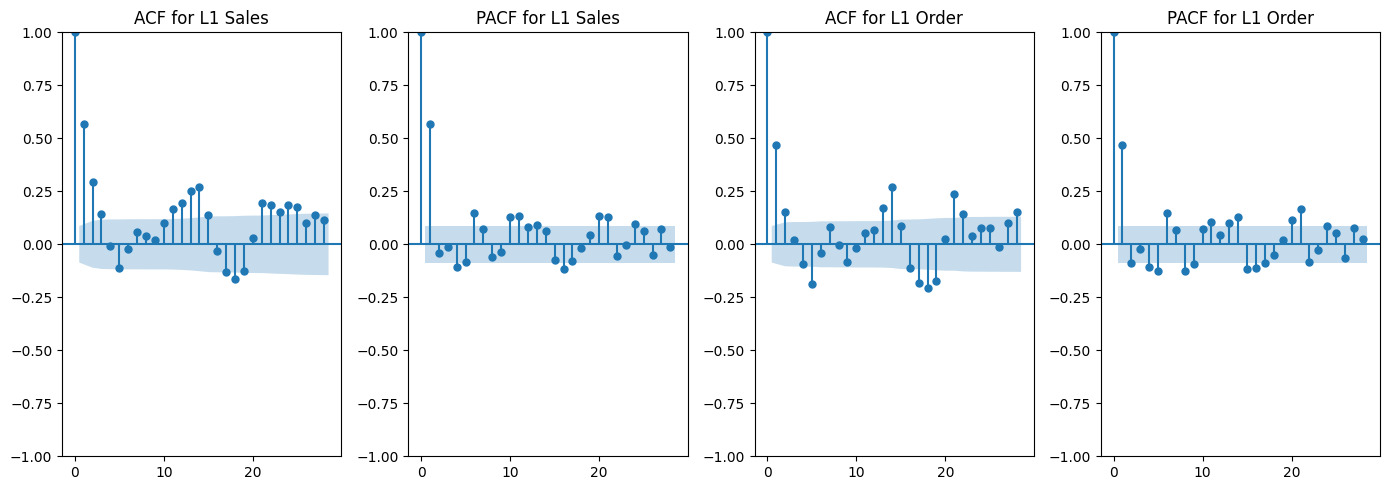

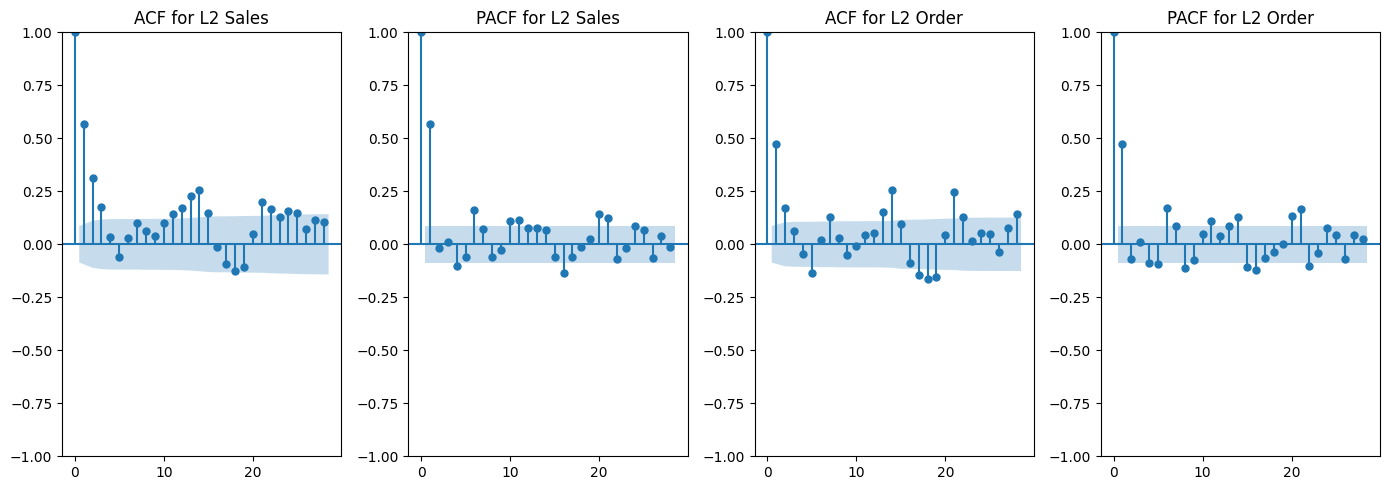

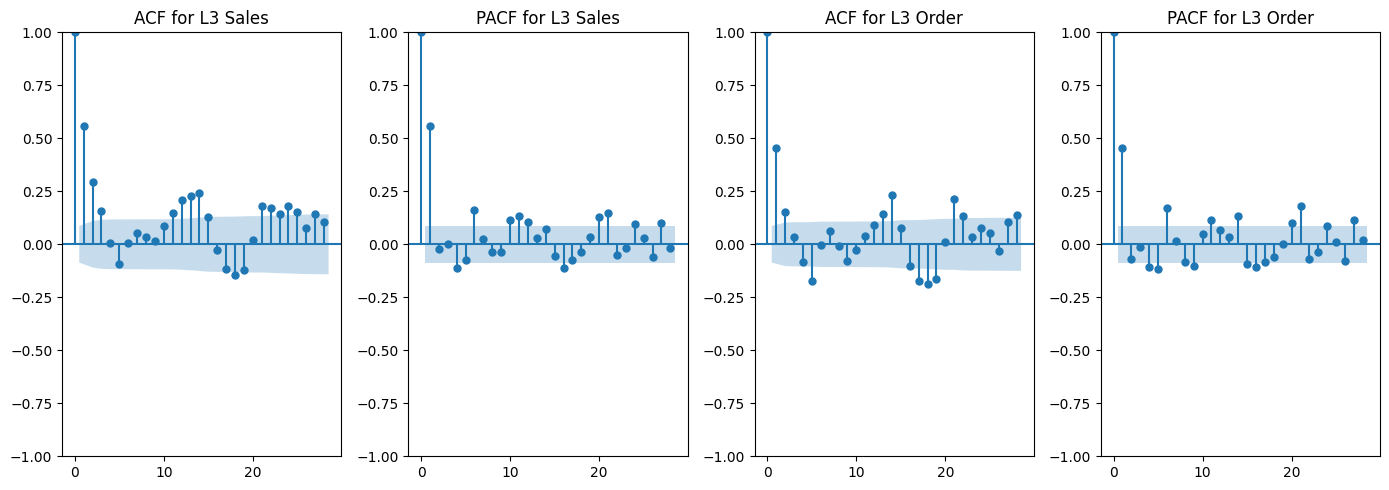

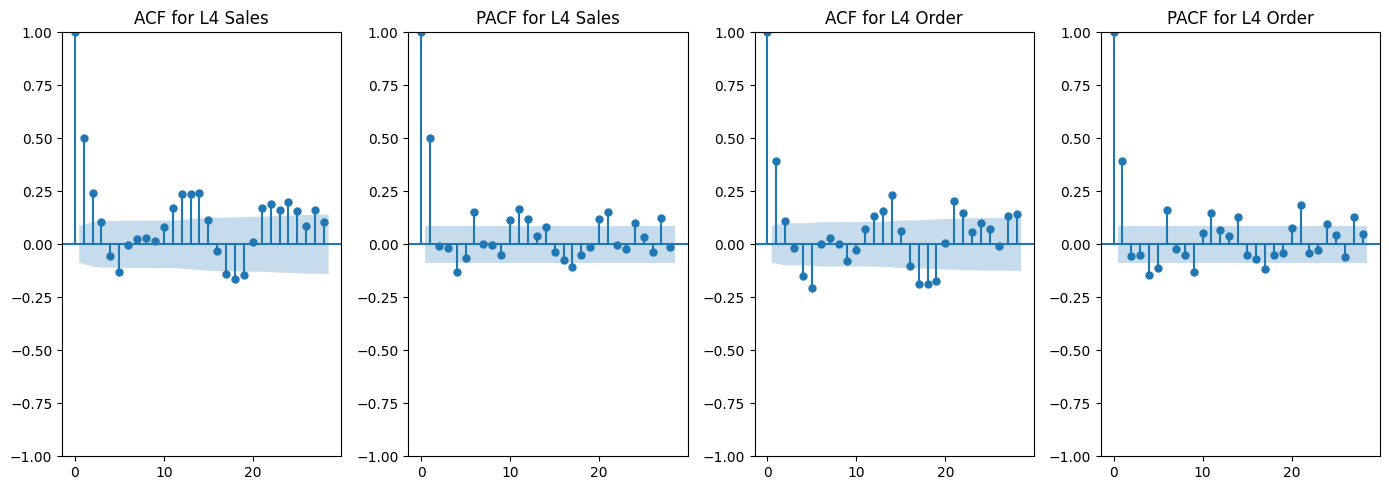

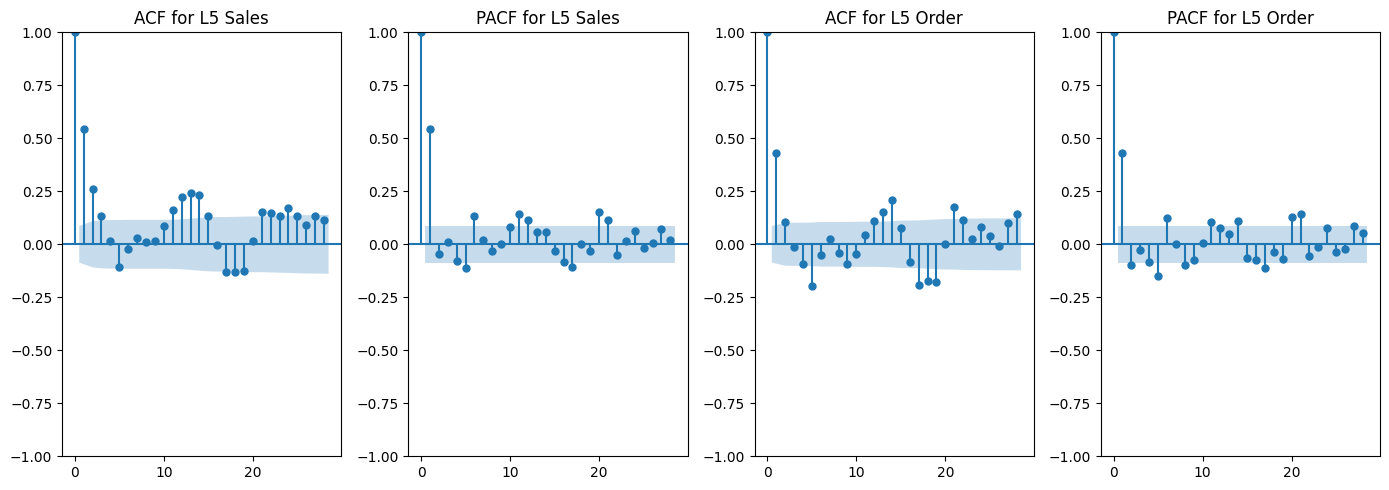

In [45]:
#@title Location Wise Sales and Order ACF/PACF Plot
data_sales = location_wise_sales
data_order = location_wise_order
for column in data_sales.columns:
  acf_pacf_plot(data_sales[column], data_order[column])

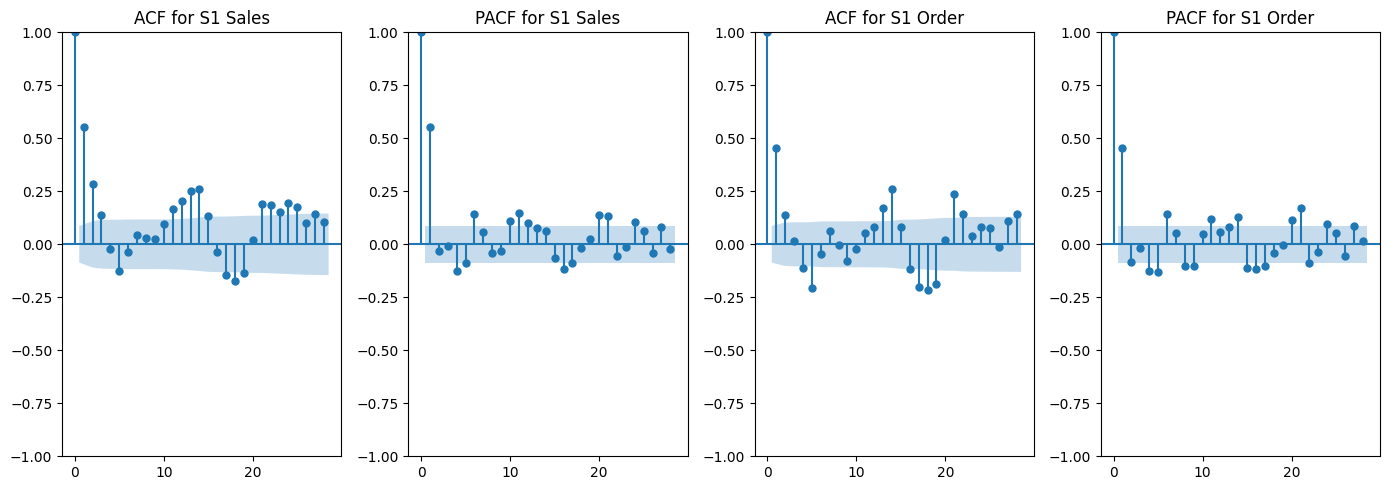

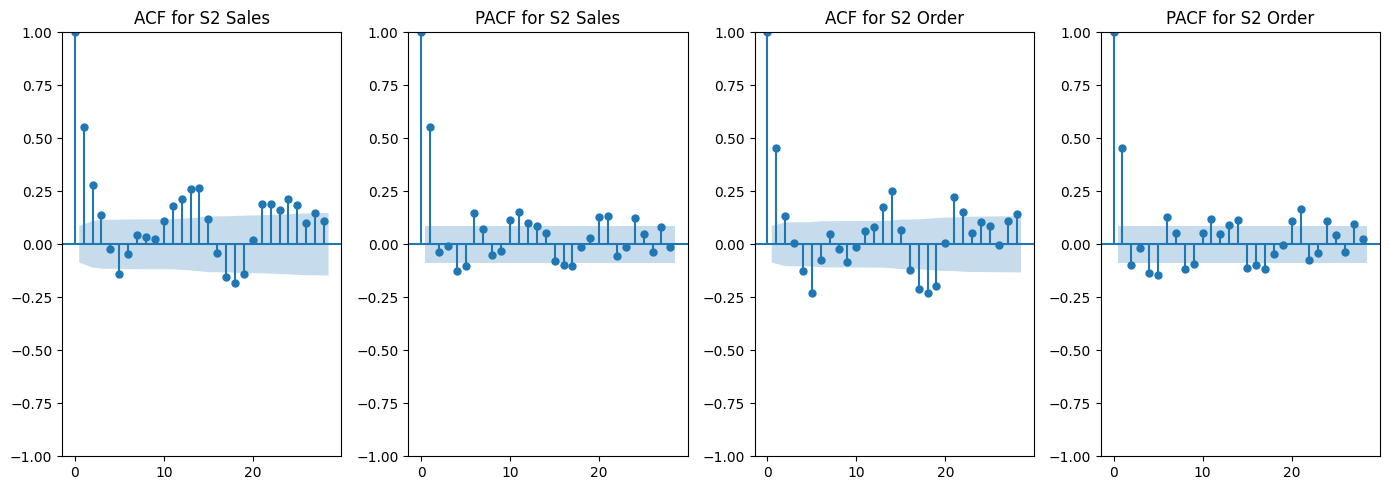

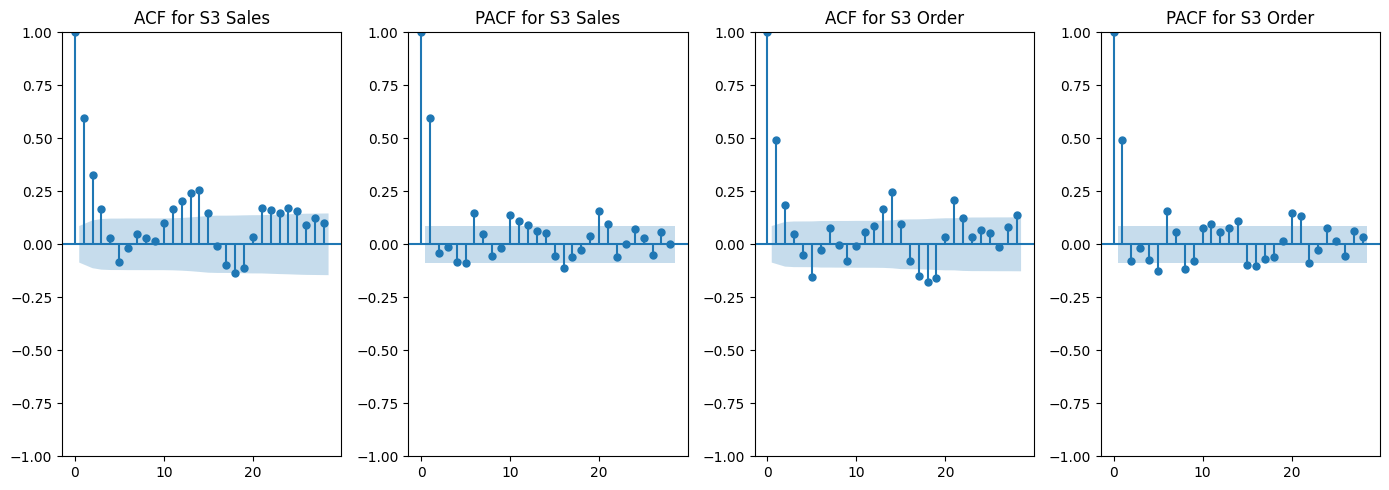

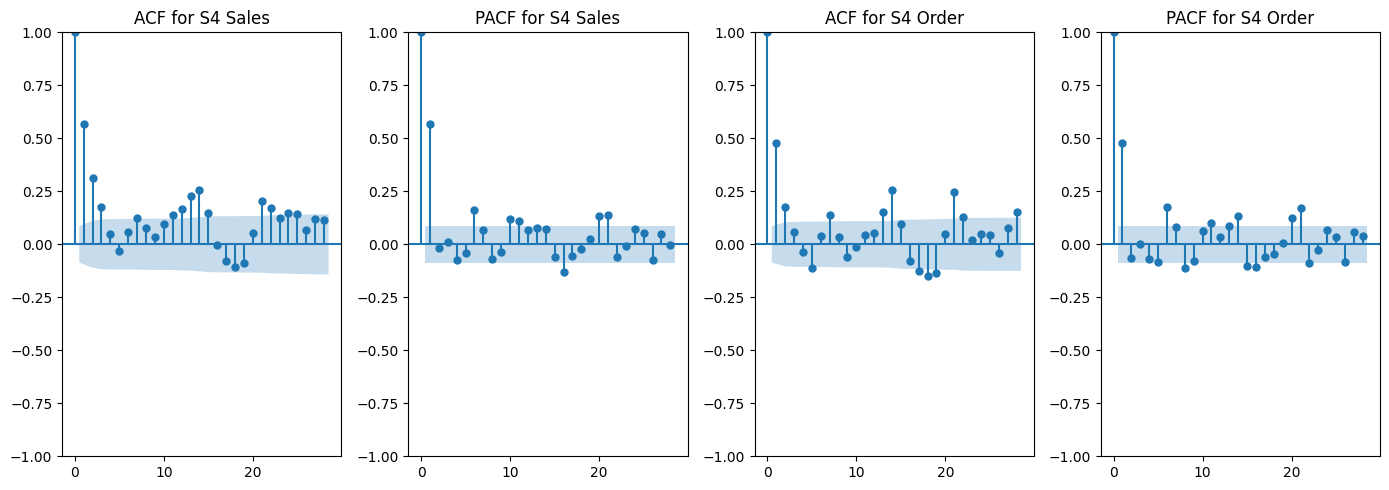

In [46]:
#@title Store type Wise Sales and Order ACF/PACF Plot
data_sales = store_type_wise_sales
data_order = store_type_wise_order
for column in data_sales.columns:
  acf_pacf_plot(data_sales[column], data_order[column])

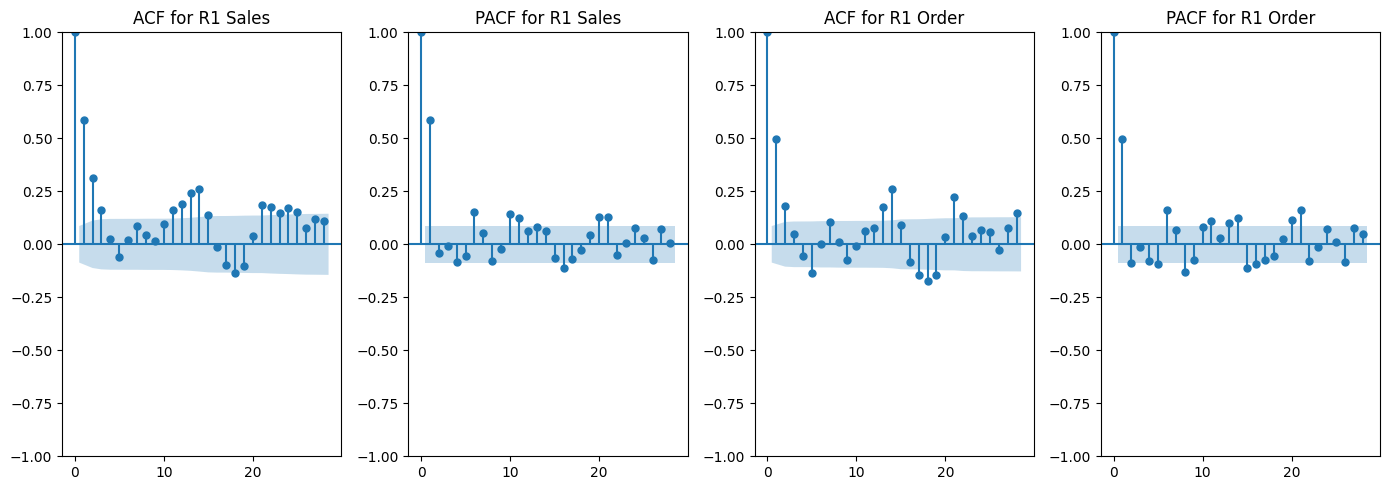

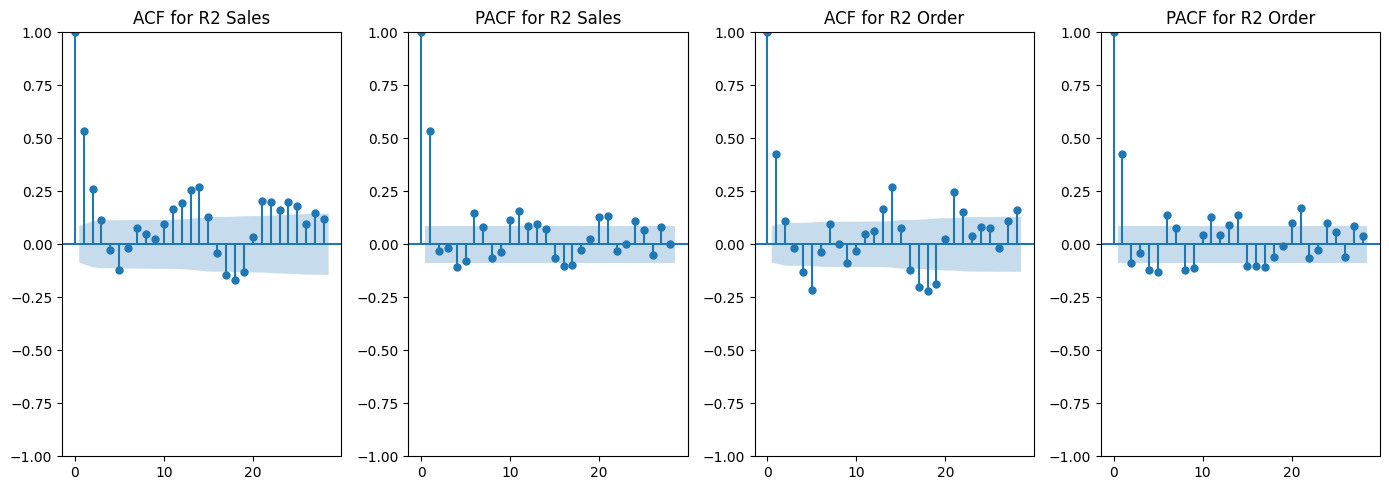

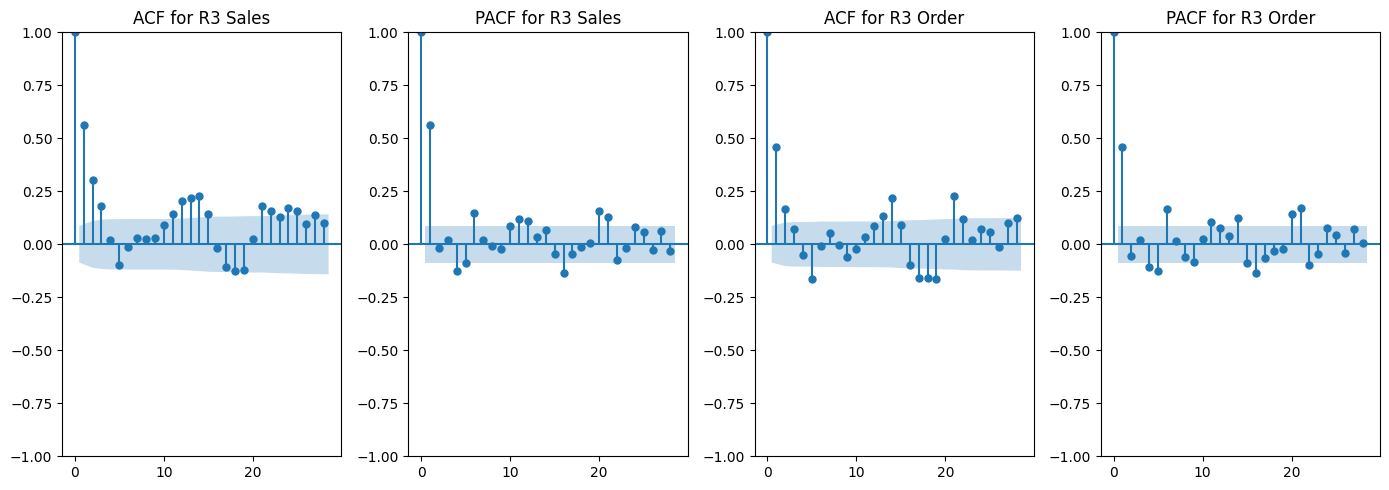

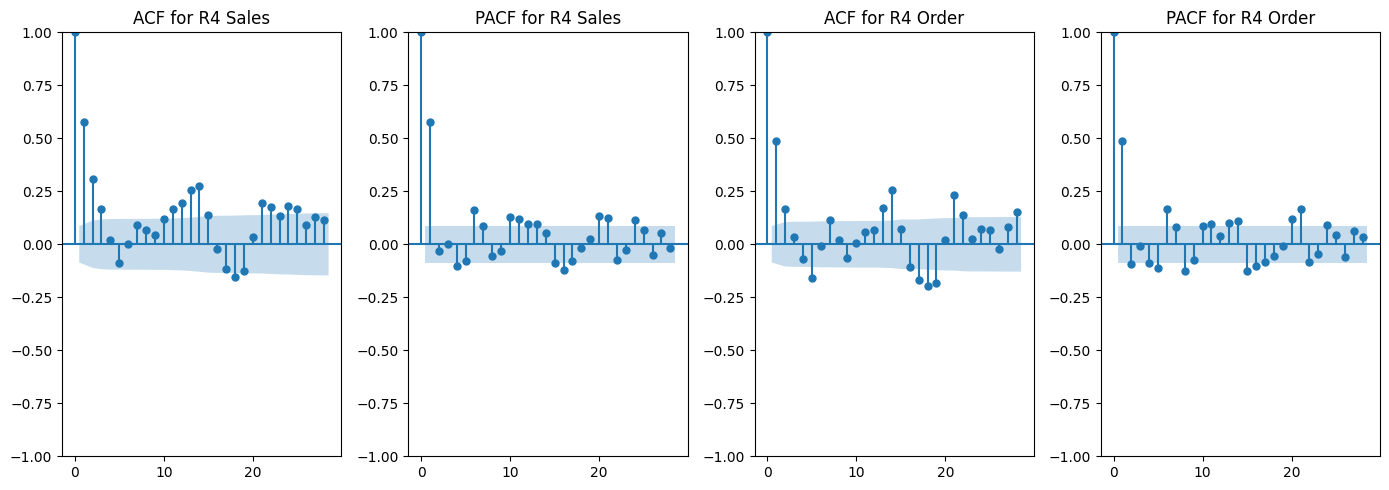

In [47]:
#@title Region Wise Sales and Order ACF/PACF Plot
data_sales = region_wise_sales
data_order = region_wise_order
for column in data_sales.columns:
  acf_pacf_plot(data_sales[column], data_order[column])

## 10. Seasonality Charts

In [48]:
#@title Seasonality Charts function
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_chart(series_sales, series_order):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
  # Plot Sales Seasonality in first cell
  result = seasonal_decompose(series_sales, model='additive', period=None)
  result.seasonal.plot(ax=ax1)
  ax1.set_title(f'Seasonality for {series_sales.name} Sales')
  # Plot Order Seasonality in second cell
  result = seasonal_decompose(series_order, model='additive', period=None)
  result.seasonal.plot(ax=ax2)
  ax2.set_title(f'Seasonality for {series_order.name} Order')

  # Adjust layout
  plt.tight_layout()
  plt.show()

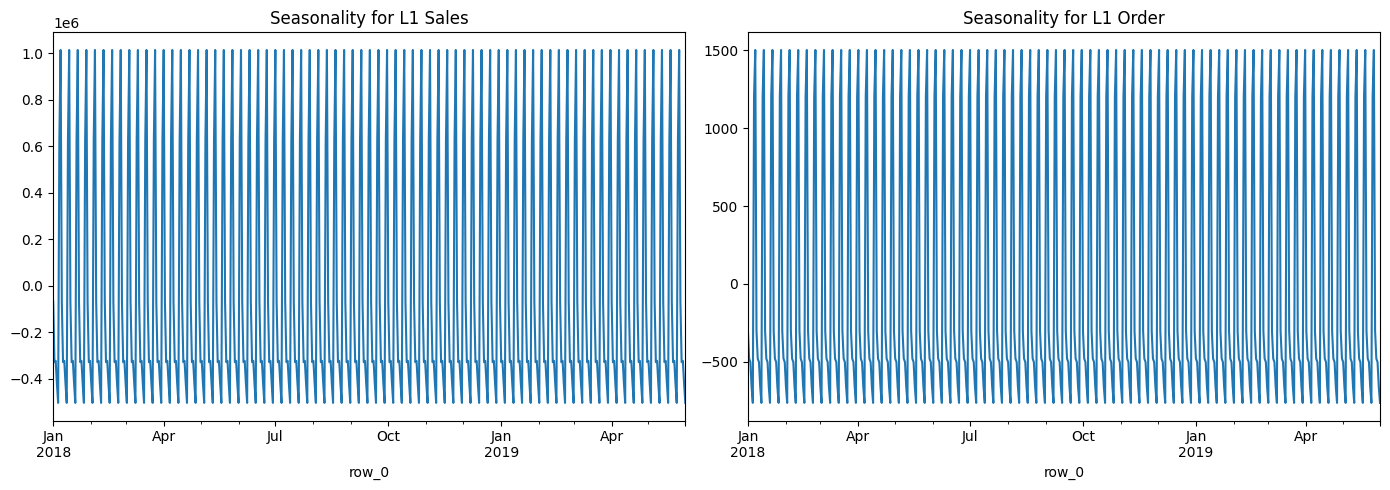

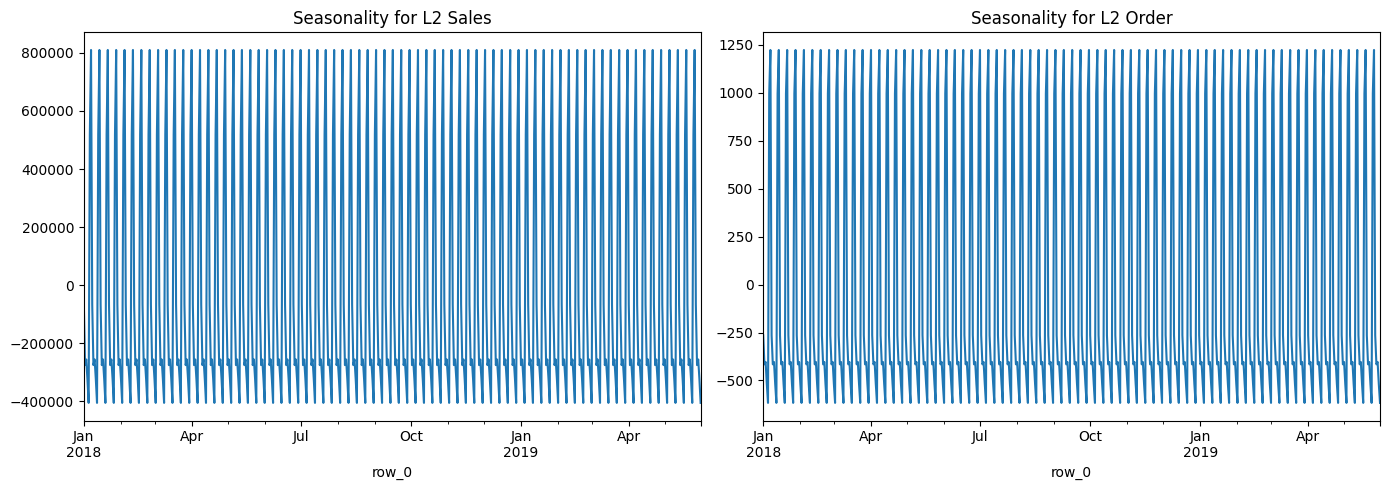

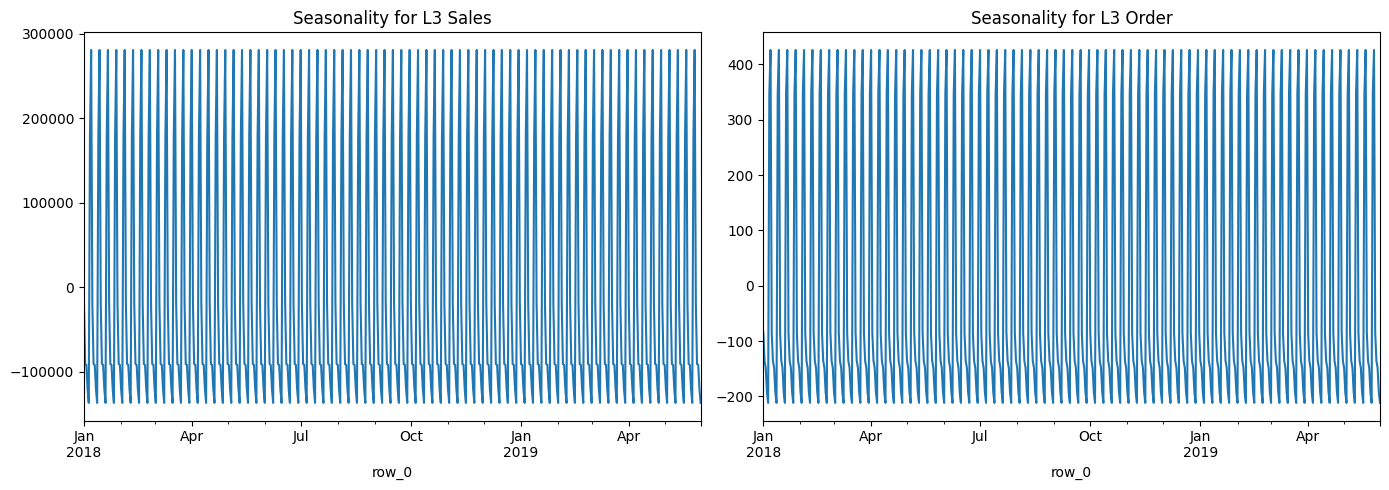

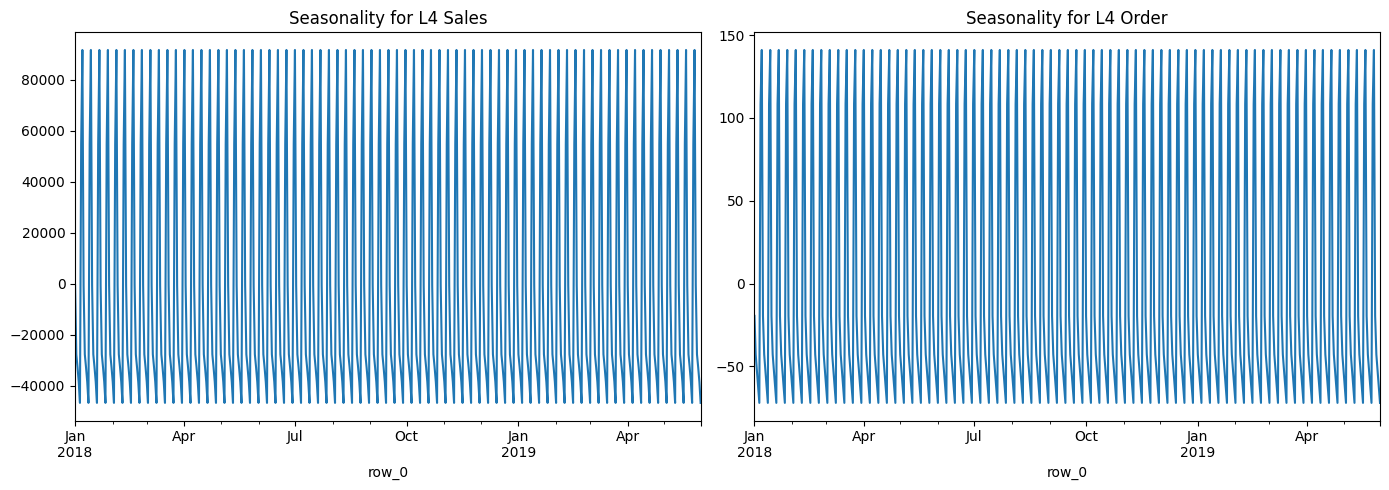

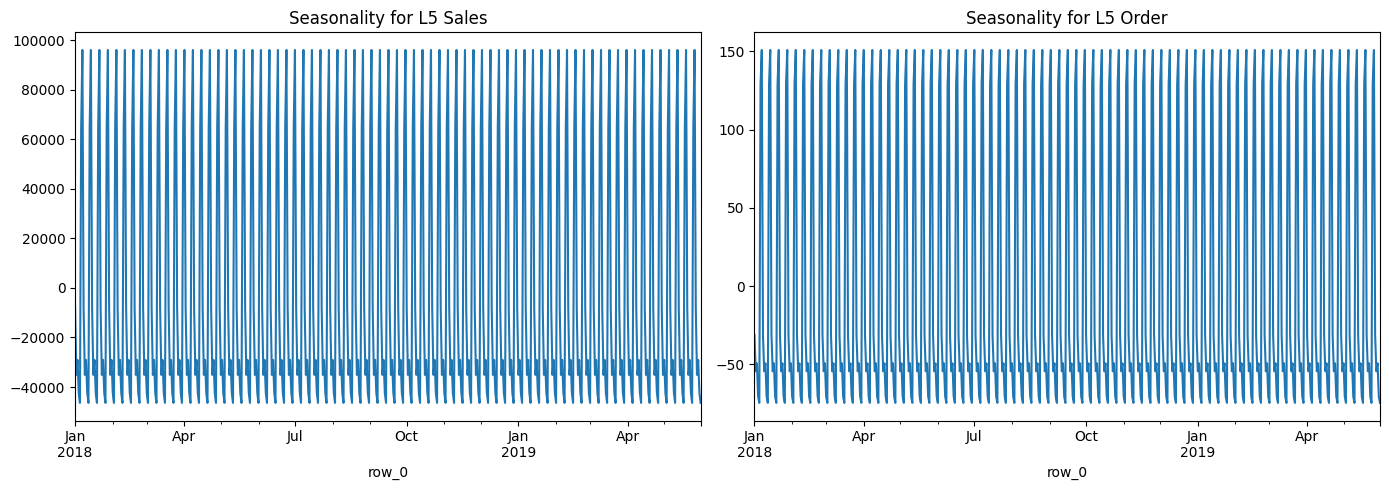

In [49]:
#@title Location Wise Sales and Order Seasonality Plot
data_sales = location_wise_sales
data_order = location_wise_order
for column in data_sales.columns:
  seasonal_chart(data_sales[column], data_order[column])

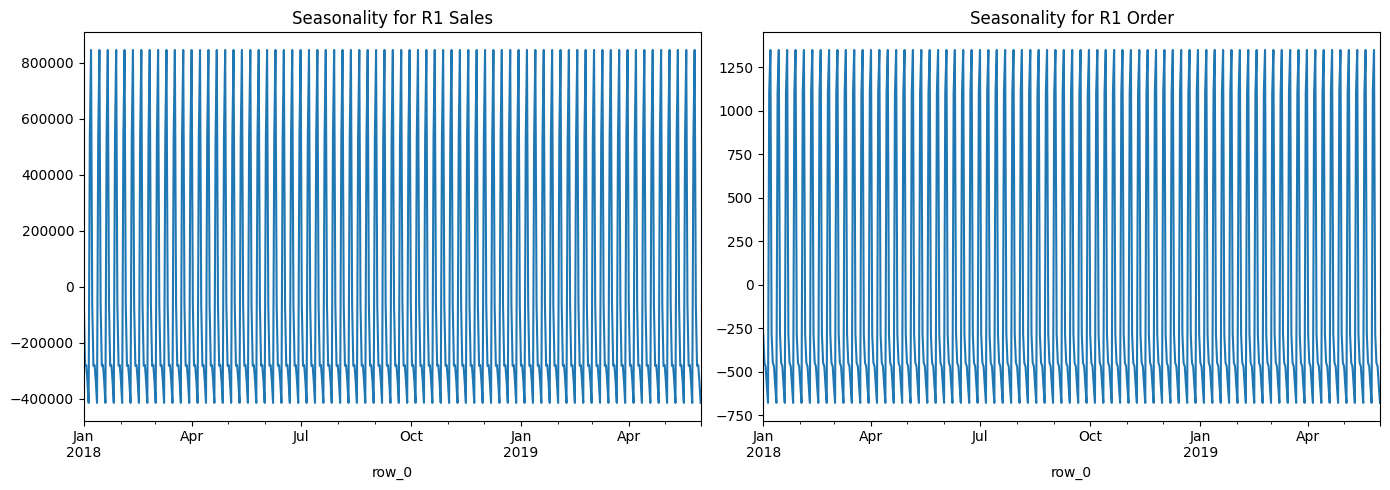

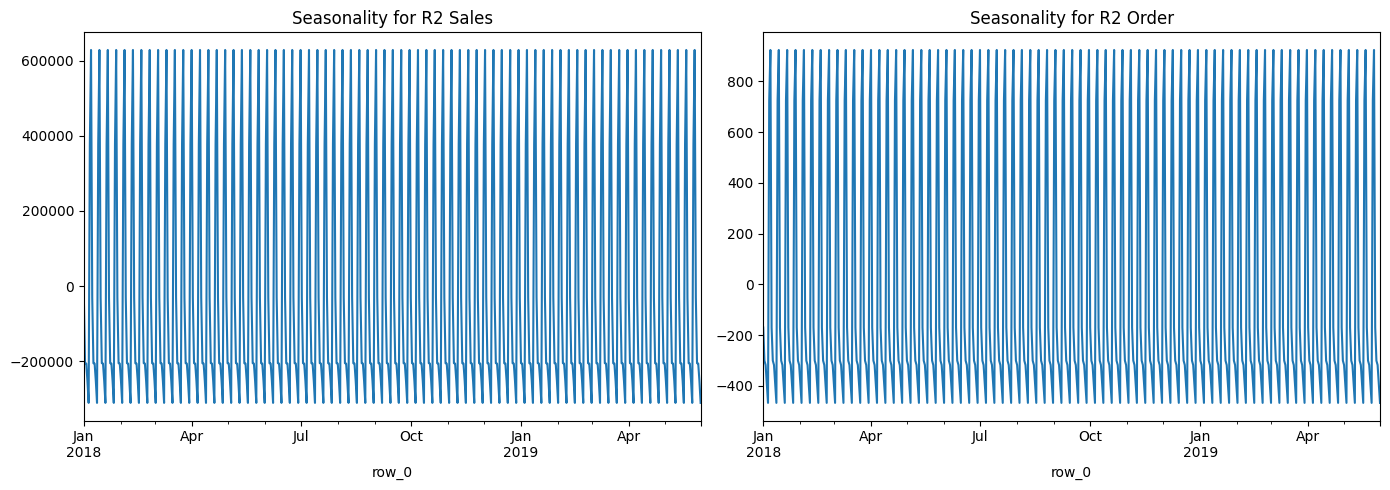

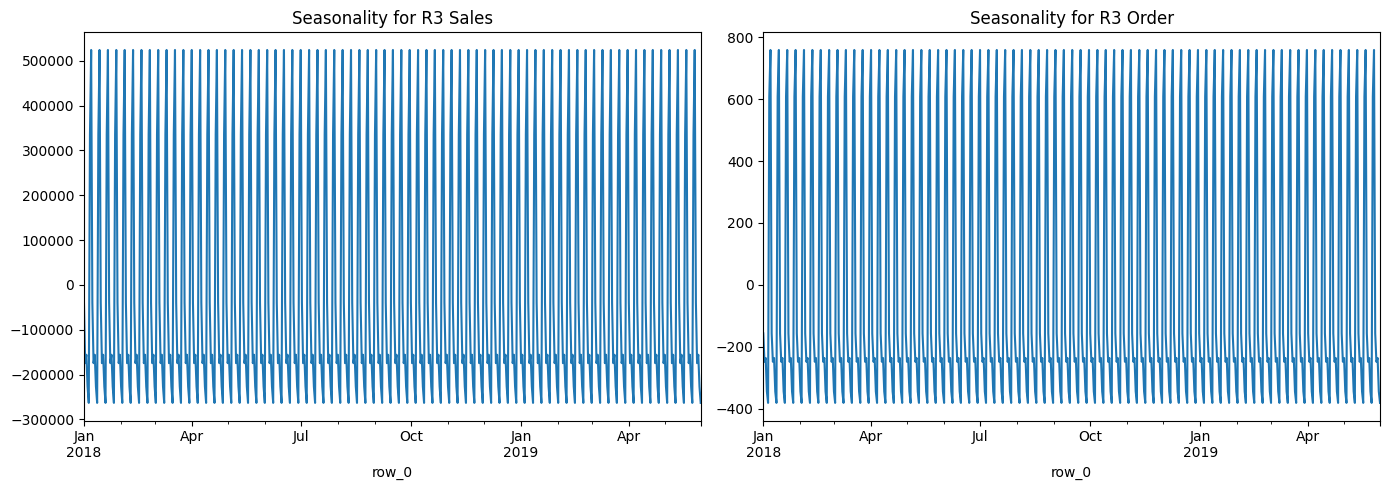

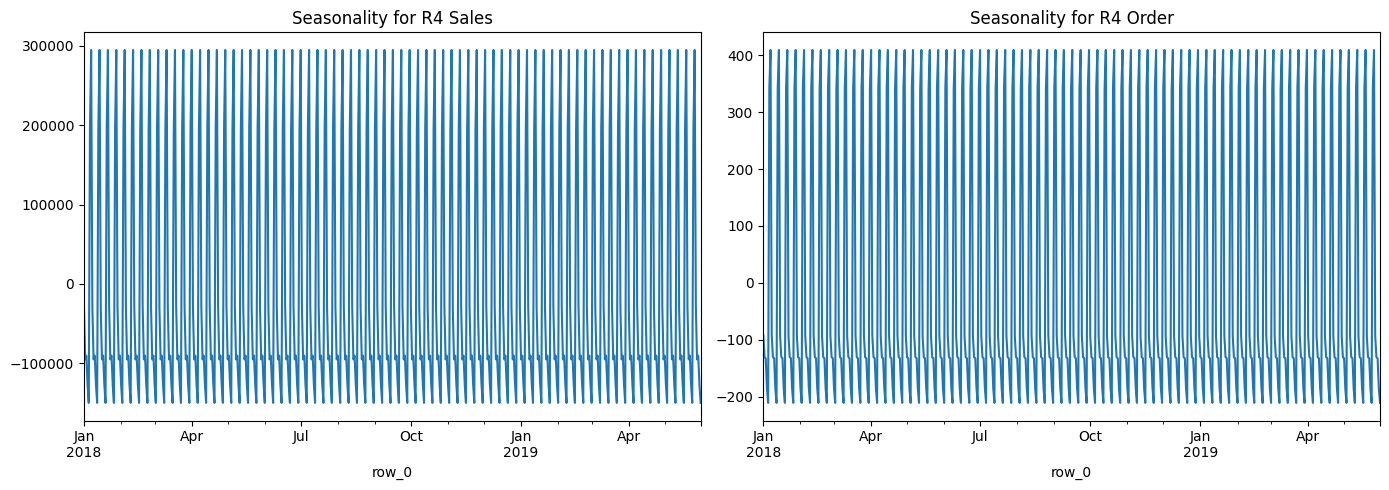

In [50]:
#@title REgion Wise Sales and Order Seasonality Plot
data_sales = region_wise_sales
data_order = region_wise_order
for column in data_sales.columns:
  seasonal_chart(data_sales[column], data_order[column])

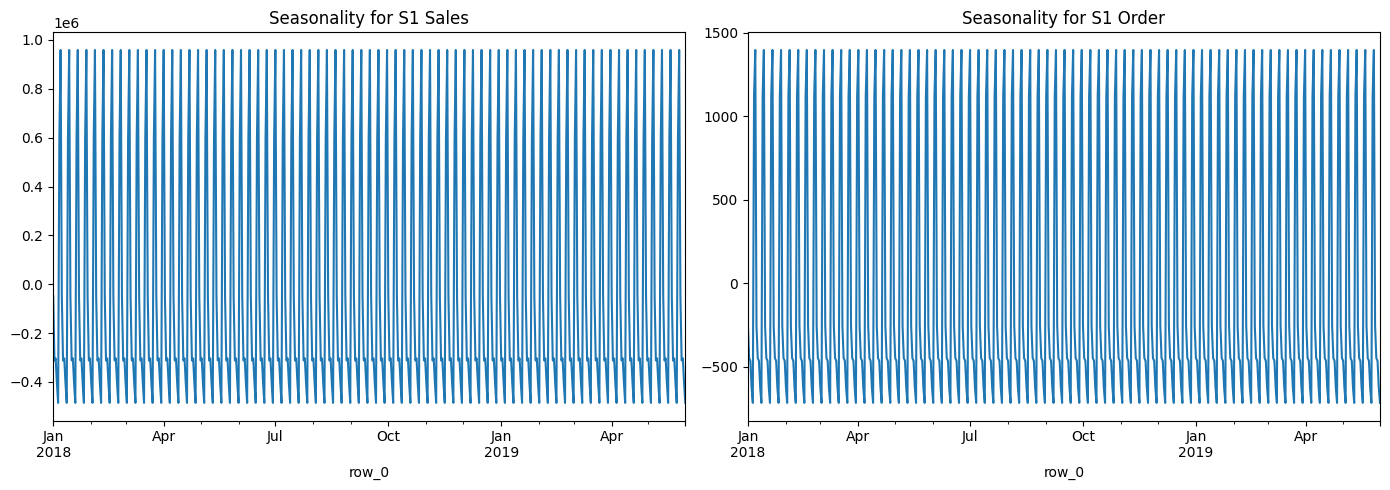

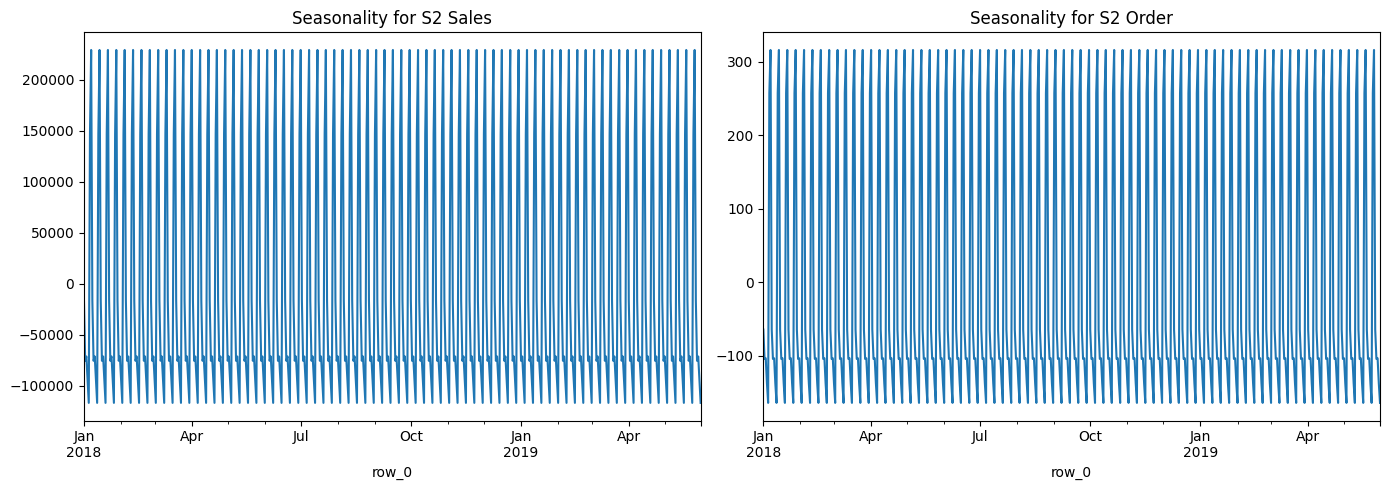

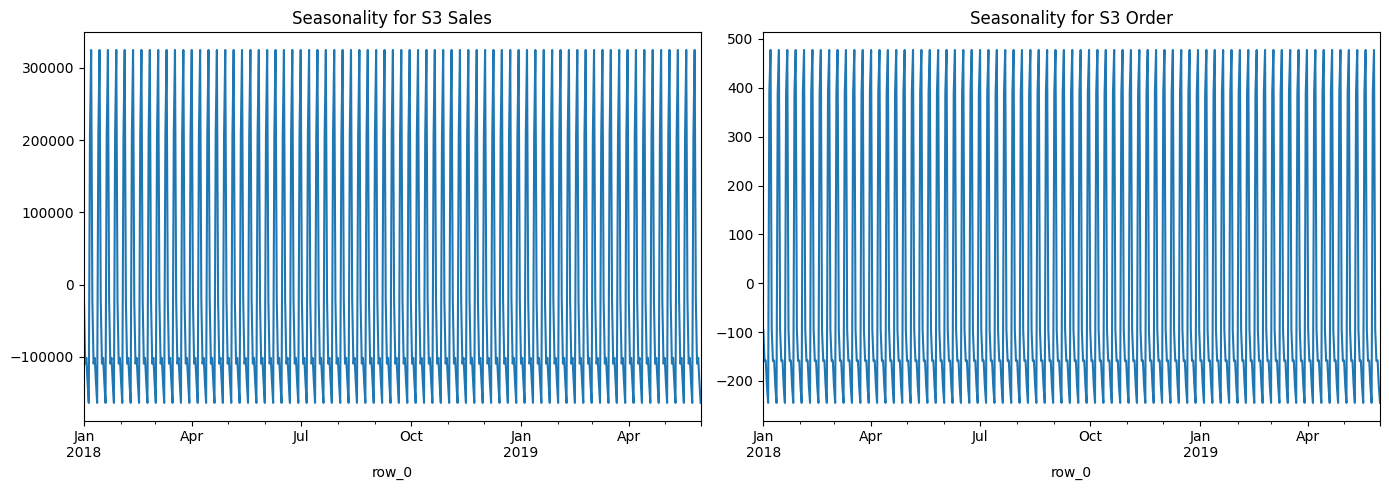

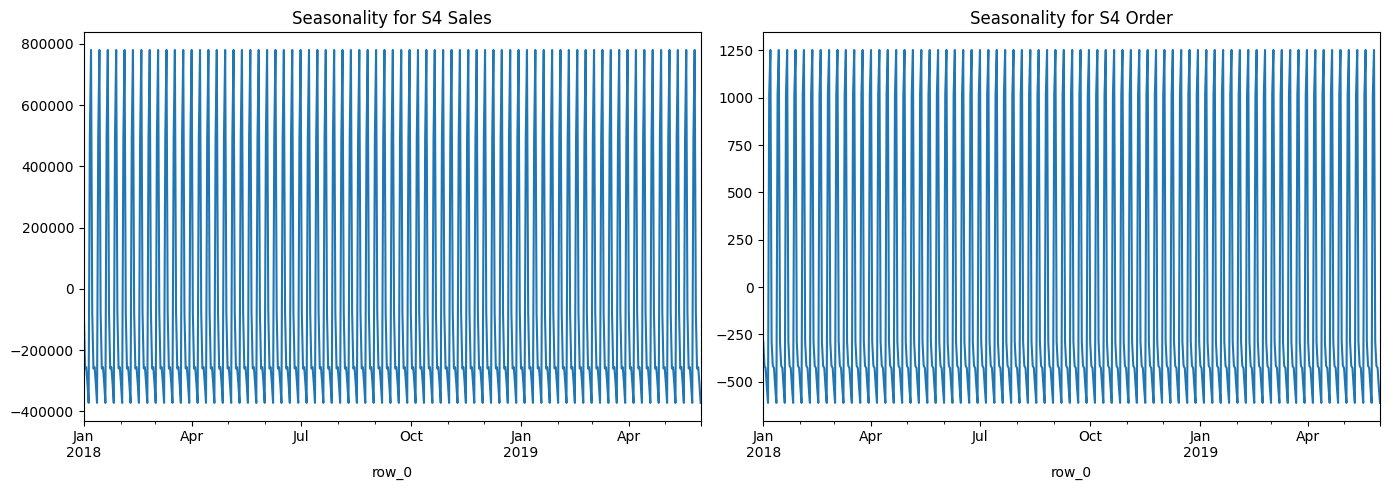

In [51]:
#@title StoreType Wise Sales and Order Seasonality Plot
data_sales = store_type_wise_sales
data_order = store_type_wise_order
for column in data_sales.columns:
  seasonal_chart(data_sales[column], data_order[column])

# C. Model building and Evaluation

## 10. Data splitting

To build a model we will split data into 80:20 ratio. First 80% rows will be train data whereas remaininf 20% will be test data.

In [52]:
#@title Train/Test splitting stage of pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class TimeSeriesSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, test_size=0.2):
        self.test_size = test_size
        self.train_data, self.test_data = None, None

    def fit(self, X, y=None):
        """No fitting required; just for compatibility."""
        return self

    def transform(self, X, y=None):
        """Split the single-column time series into train and test sets."""
        n_rows = len(X)
        split_index = int(n_rows * (1 - self.test_size))
        self.train_data = X.iloc[:split_index].asfreq('D')
        self.test_data = X.iloc[split_index:].asfreq('D')
        return self.train_data, self.test_data

## 12. SARIMAX modeltraining

To  have better accuracy in forecasting we will use exogenous variable

### Basic model building preperation

In [53]:
#@title Seasonality Factor function
def get_seasonal_factor_fft(data:pd.Series)->int:
    """
    Automatically detects seasonality using FFT.
    Args:
        data (pd.Series): Time series data.
    Returns:
        int: Seasonal factor (dominant period).
    """
    fft = np.fft.fft(data - np.mean(data))  # Remove mean for better results
    freqs = np.fft.fftfreq(len(data))
    magnitudes = np.abs(fft)
    dominant_freq = freqs[np.argmax(magnitudes[1:]) + 1]  # Ignore zero frequency
    seasonal_period = int(round(1 / dominant_freq)) if dominant_freq != 0 else None
    return abs(seasonal_period)

In [54]:
for column in train_sales.columns:
  seasonal_factor_fft = get_seasonal_factor_fft(train_sales[column])
  #print(f"Detected seasonal factor (FFT) {column}: {seasonal_factor_fft}")

In [55]:
#@title Model training stage
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.base import BaseEstimator
from sklearn.metrics import (make_scorer, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape)

class SARIMAXEstimator(BaseEstimator):
    def __init__(self, order=(1,0,1), seasonal_order = (1,0,1,12)):
        self.order = order
        self.seasonal_order = seasonal_order
        self.model_ = None

    def fit(self, X, exog=None):
      self.exog_train=exog
      try:
        if isinstance(self.exog_train, pd.Series):
          self.model_ = SARIMAX(X, exog=self.exog_train, order=self.order, seasonal_order=self.seasonal_order).fit(disp=False)
        else:
          self.model_ = SARIMAX(X, order=self.order, seasonal_order=self.seasonal_order).fit(disp=False)
      except Exception as e:
        print(f"Skipping: order={self.order}, seasonal_order={self.seasonal_order}. Error: {e}")
        self.model_ = None
      return self

    def predict(self, n_steps, exog=None):
      if self.model_ is None:
        return np.full(n_steps, 1E-10)
      try:
        if not isinstance(self.exog_train, pd.Series):
          return self.model_.forecast(steps=n_steps)
        elif isinstance(exog, pd.Series):
          return self.model_.forecast(steps=n_steps, exog=exog[:n_steps])
        else:
          raise ValueError('No exog data provided')
      except Exception as e:
        print(e)
      return None

    def score(self, X, exog=None):
        n_steps = len(X)
        predictions = self.predict(n_steps, exog)
        return int(100*mape(X, predictions))

In [57]:
#@title Pipeline
splitter = TimeSeriesSplitter()
X_train, X_test = splitter.fit_transform(train_sales.Sales)
X_train_exog, X_test_exog = splitter.fit_transform(exog_train_holiday)

from itertools import product
#@title Define the parameter grid
p,d,q = range(1,3), [0,1,2], range(1, 3)
order = list(product(p, d, q))

# seasonal_parameters P, D, Q, S
P, D, Q, S = range(1, 3), [0], range(1, 3), [12]
seasonal_order = list(product(P, D, Q, S))

param_grid = list(product(order, seasonal_order))


for order, seasonal in param_grid:
  print('===================================================================================')
  print(order, seasonal, end=':')
  sarimax_estimator = SARIMAXEstimator(order=order, seasonal_order=seasonal)
  sarimax_estimator.fit(X=X_train, exog=X_train_exog)
  print(sarimax_estimator.score(X=X_test, exog=X_test_exog))

(1, 0, 1) (1, 0, 1, 12):37
(1, 0, 1) (1, 0, 2, 12):37
(1, 0, 1) (2, 0, 1, 12):37
(1, 0, 1) (2, 0, 2, 12):37
(1, 0, 2) (1, 0, 1, 12):37
(1, 0, 2) (1, 0, 2, 12):37
(1, 0, 2) (2, 0, 1, 12):37
(1, 0, 2) (2, 0, 2, 12):37
(1, 1, 1) (1, 0, 1, 12):21
(1, 1, 1) (1, 0, 2, 12):19
(1, 1, 1) (2, 0, 1, 12):19
(1, 1, 1) (2, 0, 2, 12):19
(1, 1, 2) (1, 0, 1, 12):21
(1, 1, 2) (1, 0, 2, 12):19
(1, 1, 2) (2, 0, 1, 12):19
(1, 1, 2) (2, 0, 2, 12):19
(1, 2, 1) (1, 0, 1, 12):28
(1, 2, 1) (1, 0, 2, 12):21
(1, 2, 1) (2, 0, 1, 12):21
(1, 2, 1) (2, 0, 2, 12):21
(1, 2, 2) (1, 0, 1, 12):30
(1, 2, 2) (1, 0, 2, 12):23
(1, 2, 2) (2, 0, 1, 12):22
(1, 2, 2) (2, 0, 2, 12):23
(2, 0, 1) (1, 0, 1, 12):37
(2, 0, 1) (1, 0, 2, 12):37
(2, 0, 1) (2, 0, 1, 12):37
(2, 0, 1) (2, 0, 2, 12):37
(2, 0, 2) (1, 0, 1, 12):37
(2, 0, 2) (1, 0, 2, 12):38
(2, 0, 2) (2, 0, 1, 12):37
(2, 0, 2) (2, 0, 2, 12):Skipping: order=(2, 0, 2), seasonal_order=(2, 0, 2, 12). Error: LU decomposition error.
100
(2, 1, 1) (1, 0, 1, 12):21
(2, 1, 1) (1, 0, 2, 

In [65]:
best_model = SARIMAXEstimator(order=(1,1,1), seasonal_order=(1,0,2,12))
best_model.fit(X=X_train, exog=X_train_exog)

SARIMAXEstimator(order=(1, 1, 1), seasonal_order=(1, 0, 2, 12))

In [89]:
best_model

# Save model into pickle file
import pickle
with open('X_text_exog.pkl', 'wb') as file:
    pickle.dump(X_test_exog, file)

# Other

In [ ]:
#@title Function for building best SARIMAX model
def bestSARIMAX(model_language,parameters,seasonal_parameters):
  # Initialize a DataFrame to store the results
  results = []
  # Fit the SARIMAX model for each combination of parameters
  for param in parameters:
      for seasonal_param in seasonal_parameters:
          try:
              SARIMAX_model = SARIMAX(train[model_language],exog=exog_train,
                              order=param,
                              seasonal_order=seasonal_param,
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

              # Store the results in the DataFrame
              test[f'{model_language}_pred']=SARIMAX_model.forecast(steps=prediction_count, exog=exog_test)
              results.append((param, seasonal_param, mape_score(test[model_language],test[f'{model_language}_pred']), SARIMAX_model.aic))

          except Exception as e:
              continue

  results_df = pd.DataFrame(results, columns=['params', 'seasonal_params', 'MAPE', 'AIC'])
  results_df.sort_values(by=['MAPE','AIC'], inplace=True)
  # Find the best parameters
  best_params = results_df.iloc[0]

  print(f'''Best SARIMAX Model for {model_language} language
  (p,d,q):{best_params.params}, (P,D,Q,S):{best_params.seasonal_params},
  MAPE:\t{best_params.MAPE}
  AIC:\t{best_params.AIC}''')

  # Fit the best model
  return SARIMAX(train[model_language],exog=exog_train, order=best_params.params, seasonal_order=best_params.seasonal_params, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

In [ ]:
#@title Finding best model

best_SARIMAX_model = {}
for model_language,non_seasonal_order in zip(language.columns,model_parameters):
  #best_SARIMAX_model[model_language] = bestSARIMAX(model_language,non_seasonal_order,seasonal_parameters)
  best_SARIMAX_model[model_language] = bestSARIMAX(model_language,parameters,seasonal_parameters)

In [ ]:
(p,d,q)

In [ ]:
#@title Final Model Building
best_fit_model_parameters = {
    'de':[[(5,1,2)],[(1,0,1,7)]],
    'en':[[(4,1,2)],[(1,0,1,7)]],
    'es':[[(3,1,2)],[(2,0,1,7)]],
    'fr':[[(3,1,2)],[(1,0,1,7)]],
    'ja':[[(5,1,2)],[(3,0,1,7)]],
    'ru':[[(1,1,0)],[(2,0,1,7)]],
    'zh':[[(1,1,1)],[(3,0,1,7)]]}

for model_language in language.columns:
#  print(model_language,best_fit_model_parameters[model_language][0],best_fit_model_parameters[model_language][1])
  best_SARIMAX_model[model_language] = bestSARIMAX(model_language,best_fit_model_parameters[model_language][0],best_fit_model_parameters[model_language][1])

For all possible combinations, MAPE score of SARIMAX model is very high for `es` language code, this means `EXOG` variable is not significant. So we will continue without `EXOG` variable for `es` model.

### Model Summary and Visual Representation

#### English Model

In [ ]:
#@title Graphical representation of model
model_language='en'
print(best_SARIMAX_model[model_language].summary())
print('===================================================================================')

test[f'{model_language}_pred']=best_SARIMAX_model[model_language].forecast(steps=prediction_count, exog=exog_test)
plt.figure(figsize=(15, 5))
plt.plot(test[[model_language,f'{model_language}_pred']], label=['test','pred'])
plt.plot(train[[model_language]], label='train')
plt.legend()
best_SARIMAX_model[model_language].plot_diagnostics(figsize=(15, 10)).show()
plt.show()

In [ ]:
#@title Final Pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('Split',TimeSeriesSplitter(test_size=0.2)),
    ('Model',SARIMAXWrapper())
])

## 14. Facebook Prophet

In SARIMAX Model we cannot have multiple seasonality or multiple exogenous variable, we can only select one value. To overcome this disability, we will use an open source library called `prophet` which is developed by Facebook

**Some features of Facebook's Prophet:**
* Provides intuitive parameters which can be easily tuned
* It is robust to missing data and shifts in the trend, and typically handles outliers well.
* It can account for multiple seasonalities. This is possible because under the hood, the math of seasonalities is based on Fourier transforms, which help incorporate this.
* The Prophet uses a decomposable time series model with three main model components
* They are combined in the following equation:
        y(t)= g(t) + s(t) + h(t) + εt

  **g(t):** piece wise linear or logistic growth curve for modeling non-periodic changes in time series (**trend**)

  **s(t):** periodic changes (e.g. weekly/yearly **seasonality**)

  **h(t):** effects of **holidays** (user provided) with irregular schedules

  **εt:** **error term** accounts for any unusual changes not accommodated by the model.

### Import Prophet Library and Prepare Data

In [ ]:
from prophet import Prophet

In [ ]:
df = language.copy()
df['campaign'] = exog
df.reset_index(inplace=True)
df.rename(columns={'index':'ds'}, inplace=True)

### German Model

In [ ]:
model_language = 'de'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### English Model

In [ ]:
model_language = 'en'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### Spanish Model

In [ ]:
model_language = 'es'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### French Model

In [ ]:
model_language = 'fr'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### Japanese Model

In [ ]:
model_language = 'ja'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### Russian Model

In [ ]:
model_language = 'ru'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

### Chinese Model

In [ ]:
model_language = 'zh'
df['y'] = df[model_language]
df1 = df[['ds','y','campaign']]
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=1)
model.add_regressor('campaign')
model.fit(df[:train_threshold])
forecast = model.predict(df)
fig = model.plot(forecast)

In [ ]:
print(f'Performance Score for {model_language} is:')
performance(df1['y'],forecast['yhat'])
plt.figure(figsize=(15, 5))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('campaign==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-08-01'), pd.to_datetime('2016-12-31'))
plt.legend()

# Case Study Insights:

**Problem Description**
* We have total 145K wikipedia pages with pageviews for **550** days. Starting from **2015-07-01** to **2016-12-31**

* There are 15455 pages in this dataset for which more than 30% of the data is missing. Those pages need to be dropped from the dataset. After dropping 129.6k pages are there to process further.

* For remaining Null values following strategy is used for imputation
  * Back-filling of initial null values
  * Linear interpolation for null values in between actual values
  * Forward-filling of tailing null values

* Apart from top 7 languages other language pages are less than 100 in numbers and among 129.6k pages, consolidated 1109 (0.86%) pages which can be considered as outliers. These pages can be dropped. After dropping them 128.5k pages we have for model building.

* List of Languages: [zh, fr, en, ru, de, ja, es]
* List of Access Device: [all-access, desktop, mobile-web]
* List of Traffic Origin: [spider, all-agents]

**Insights from EDA**
1. Among all the languages **_English_** have highest views and other languages have almost similar views
2. Half of the views coming from **_all-access_** device and remaining half views are splitted between **_desktop_** and **_mobile_**
3. 75% of web traffic is generated from **_all-agents_** origin followed by 25% from **_Spider_**
4. Whenever there is campaign (1 in exogenous variable) overall web traffic is very high
5. From hypothesis test it is evident that **language, access and origin** are not independent on each other

**Aggregating and Pivoting**
* We have 128.5k pages after data processing and cleaning, and we cannot 128.5k build a individual forecasting model.
* We have three options to aggregate data and aggregation method should be summing
  * Language
  * Access Device
  * Traffic Origin

* For this case study we will build a forecasting models based on languages

**Insights from timeseries plot**

All timeseries have seasonality of 7 days
1. **German:** There are multiple trends (Up and Down) in this time series
2. **English:** This is an increasing trend time series and very high count on campaign days (exogenous variable)
3. **Spanish:** Additional seasonality is 6 months but no effect of campaign
4. **French:** Initial 6 months is there is minor increasing trend but overall timeseries is stationary with very high values in month of April 2016
5. **Japanese:** This timeseris having high variance with change point in January 2016
6. **Russian:** Apart from effect of campaign between Mid-July to Mid-August 2016, this timeseries is stationary and variance is very low
7. **Chinese:** This timeseries also have no effect of campaign

**Dickey Fuller test** for stationarity with 95% confidence interval

Result of adfuller test is as below which matches with observation of timeseries plot too.
* Detrending is done by 1 difference gives us stationary timeseries for non-stationary timeseries, whereas differencing for stationary timeseries is not requiired.
* De-seasoning to be done by 7 as we have seasonality of 7 in our data.

-|Before Detrending||After Detrending|-
--|--|--|--|--
**Timeseries**|**Stationarity**|**p-value**|**Stationarity**|**p-value**
de|not stationary|0.130302922801|stationary|3.63472666E-10
en|not stationary|0.132635979027|stationary|4.87926062E-13
es|stationary|0.039148315767|stationary|0.037995918905
fr|stationary|0.032074345937|stationary|0.027705575705
ja|not stationary|0.061022041526|stationary|0.0
ru|stationary|0.001661966259|stationary|0.001733881900
zh|not stationary|0.188011855804|stationary|3.51291514E-11

**Insights from ACF/PACF Plots**

Language|ACF|PACF
--|--|--
German  |Cuts off after lag2            |Cuts off after lag 3
	      |MA(1)/MA(2) component present  |AR(1)/AR(2)/AR(3) component present
English |Cut off at 1 only              |Cuts off at 1 only
	      |Max MA(1) component not present|Max AR(1) component present
Spanish	|Decaying upto lag 5			      |Cuts off after lag 1
	      |MA(1)...MA(5) component present|AR(1) component presentv
French	|Decaying upto lag 4			      |Cuts off after lag 1
	      |MA(1)...MA(4) component present|AR(1) component present
Japanese|Cuts off after lag3            |Cuts off after lag 2
	      |MA(1) component present				|AR(1)/AR(2) component present
Russian	|Decaying upto lag 5			      |Cuts off after lag 2
	      |MA(1)...MA(5) component present|AR(1)/AR(2) component present
Chinese |Cuts off after lag3            |Cuts off after lag 3
	      |MA(1)/MA(2)/MA(3) component present |AR(1)/AR(2)/AR(3) component present


**Prelimnary estimate of Non-Seasonal Order from ACF/PACF charts**

Language|AR(p)|integration(d)|MA(q)
--|:--:|:--:|:--:
**German:**|1,2|1|1,2
**English:**|0,1|1|0,1
**Spanish:**|1,2,3,4,5|0|1
**French:**|1,2,3,4|0|1
**Japanese:**|1,2,3,4,5,6|1|1,2
**Russian:**|1,2,3,4,5|0|1,2
**Chinese:**|1,2,3|1|1,2,3

**ARIMA Model** uses Autoregression, Moving Average and Integration of differenciated timeseries. We are getting stationary timeseries by difference of 1 in German, English, Japanese and Chinese. But for simplicity of modeling, we have differenciated all the timeseries by 1 so value of **`d=1`** shall be in all the models. Value of **`p`** and **`q`** already have been derived from ACF and PACF plots and with the help of grid search concept best fit ARIMA model parameters are as follows.

**Language**|**(p,d,q)**|**MAPE**
--|:--:|:--:
**German:**|(2,1,3)|0.099|(1,1,2)|(1,0,1,7)|0.058
**English:**|(0,1,0)|0.069|(4,1,2)|(1,0,1,7)|0.063
**Spanish:**|(4,0,0)|0.138|(3,1,2)|(2,0,1,7)|0.315
**French:**|(5,0,1)|0.073|(3,1,2)|(1,0,1,7)|0.071
**Japanese:**|(2,0,1)|0.091|(6,1,1)|(3,0,1,7)|0.062
**Russian:**|(1,1,1)|0.103|(1,1,1)|(3,0,1,7)|0.075
**Chinese:**|(4,0,1)|0.062|(1,1,1)|(3,0,1,7)|0.063

**SARIMAX Model** on the other hand consist of seasonal orders for Autoregression, Moving Average, Differenciation and Seasonality along with exogenous variable. With the help of SARIMAX model, MAPE score is improved for all the languages except Spanish. Which shows exogenous variable (campaigning) doesn't have impact on Spanish pageview timeseries. So final forecasting model for Spanish pageviewto be built without exogenous variable and others to be built with exogenous variable.


ARIMA and SARIMAX hyper-parameter and MAPE score comparison.

-|ARIMA|-|SARIMAX|-|-
--|:--:|:--:|:--:|:--:|:--:
**Language**|**(p,d,q)**|**MAPE**|**(p,d,q)**|**(P,D,Q,S)**|**MAPE**
**German:**|(2,1,3)|0.099|(5,1,2)|(1,0,1,7)|0.053
**English:**|(0,1,0)|0.069|(4,1,2)|(1,0,1,7)|0.063
**Spanish:**|(4,0,0)|0.138|(5,0,1)|(2,0,1,7)|0.08
**French:**|(5,0,1)|0.073|(3,1,2)|(1,0,1,7)|0.071
**Japanese:**|(2,0,1)|0.091|(5,1,2)|(3,0,1,7)|0.062
**Russian:**|(1,1,1)|0.103|(1,1,0)|(2,0,1,7)|0.074
**Chinese:**|(4,0,1)|0.062|(1,1,1)|(3,0,1,7)|0.063

**Prophet Library from facebook** slightly improves forecasting accuracy compared to SARIMAX Model but overall both models have similar performance.

MAPE for each language model with Prophet modeling is as below.

**Language**|**MAPE**
--|:--:
**German:**|0.047
**English:**|0.042
**Spanish:**|0.06
**French:**|0.05
**Japanese:**|0.062
**Russian:**|0.094
**Chinese:**|0.047